# SRN: 

## ST2195 Coursework Part 2 Python

### Importing the libraries

In [1]:
import os                                                             #os.getcwd() to make sure working directory is the same for both file and datasets
import pandas as pd                                                   #Used for data manipulation and analysis and works with dataframes
import chardet                                                        #To help with UnicodeDecodeError
import datetime                                                       #Manipulates date and time
from datetime import datetime                                         #Directly access part of the above datetime class
import matplotlib.pyplot as plt                                       #Plotting library
import numpy as np                                                    #Used for working with arrays and performs numerical processing
import seaborn as sns                                                 #Higher level interface data visualisation based on matplot
from sklearn.metrics import roc_curve, roc_auc_score                  #To dislay ROC curve and to calculate AUC
from sklearn.model_selection import train_test_split, GridSearchCV    #For training and testing set, and grid search
from sklearn.linear_model import LogisticRegression                   #Logistic Regression Model
from sklearn.pipeline import Pipeline                                 #Pre-processing Pipeline
from sklearn.impute import SimpleImputer                              #For missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder       #Scaling and creating dummy variables
from sklearn.compose import ColumnTransformer                         #Transform different types

### Loading in the data of planes, carriers, airports, variable descriptions and 10 years (1999 to 2008)

In [2]:
data1 = pd.read_csv("1999.csv")                           

In [3]:
data2 = pd.read_csv("2000.csv")                          

In [4]:
with open("2001.csv", 'rb') as rawdata:                      #To solve UnicodeDecodeError
    result = chardet.detect(rawdata.read(100000))

result                                                 

{'encoding': 'windows-1251',
 'confidence': 0.8515354965929237,
 'language': 'Bulgarian'}

In [5]:
data3 = pd.read_csv("2001.csv", encoding='windows-1251')    

In [6]:
with open("2002.csv", 'rb') as rawdata:                       #To solve UnicodeDecodeError
    result = chardet.detect(rawdata.read(100000))

result

{'encoding': 'windows-1251',
 'confidence': 0.8421325049333305,
 'language': 'Bulgarian'}

In [7]:
data4 = pd.read_csv("2002.csv", encoding='windows-1251')    

In [8]:
data5 = pd.read_csv("2003.csv", dtype={'CancellationCode': str})     #To solve DtypeWarning, where I specified the dtype of 'CancellationCode' column as string

In [9]:
data6 = pd.read_csv("2004.csv")

In [10]:
data7 = pd.read_csv("2005.csv")

In [11]:
data8 = pd.read_csv("2006.csv")

In [12]:
data9 = pd.read_csv("2007.csv")

In [13]:
data10 = pd.read_csv("2008.csv")

In [14]:
ontime_df = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], ignore_index=True)
#Concating 10 dataframes vertically, and ignore_index to clear and reset original index.

In [15]:
airports_df = pd.read_csv("airports.csv")
carriers_df = pd.read_csv("carriers.csv")
planes_df = pd.read_csv("plane-data.csv")
variable_df = pd.read_csv("variable-descriptions.csv")

### Printing the dataframes

In [16]:
print(ontime_df)

          Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0         1999      1          27          3   1906.0        1908   2024.0   
1         1999      1          28          4   2016.0        1908   2126.0   
2         1999      1          29          5   1907.0        1908   2000.0   
3         1999      1          31          7   1932.0        1908   2031.0   
4         1999      1           1          5   1601.0        1535   1707.0   
...        ...    ...         ...        ...      ...         ...      ...   
60192825  2008      4          17          4   1025.0        1025   1234.0   
60192826  2008      4          17          4   1319.0        1320   1527.0   
60192827  2008      4          17          4   1335.0        1335   1556.0   
60192828  2008      4          17          4   1933.0        1935   2140.0   
60192829  2008      4          17          4    621.0         615    752.0   

          CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  Taxi

In [17]:
print(airports_df)

     iata                    airport              city state country  \
0     00M                   Thigpen        Bay Springs    MS     USA   
1     00R       Livingston Municipal        Livingston    TX     USA   
2     00V                Meadow Lake  Colorado Springs    CO     USA   
3     01G               Perry-Warsaw             Perry    NY     USA   
4     01J           Hilliard Airpark          Hilliard    FL     USA   
...   ...                        ...               ...   ...     ...   
3371  ZEF            Elkin Municipal             Elkin    NC     USA   
3372  ZER  Schuylkill Cty/Joe Zerbey        Pottsville    PA     USA   
3373  ZPH      Zephyrhills Municipal       Zephyrhills    FL     USA   
3374  ZUN                 Black Rock              Zuni    NM     USA   
3375  ZZV       Zanesville Municipal        Zanesville    OH     USA   

            lat        long  
0     31.953765  -89.234505  
1     30.685861  -95.017928  
2     38.945749 -104.569893  
3     42.741347

In [18]:
print(carriers_df)

        Code                    Description
0        02Q                  Titan Airways
1        04Q             Tradewind Aviation
2        05Q            Comlux Aviation, AG
3        06Q  Master Top Linhas Aereas Ltd.
4        07Q            Flair Airlines Ltd.
...      ...                            ...
1486      ZW    Air Wisconsin Airlines Corp
1487      ZX                   Air Georgian
1488  ZX (1)                     Airbc Ltd.
1489      ZY         Atlantic Gulf Airlines
1490     ZYZ           Skyway Aviation Inc.

[1491 rows x 2 columns]


In [19]:
print(planes_df)

     tailnum                 type                   manufacturer  issue_date  \
0     N050AA                  NaN                            NaN         NaN   
1     N051AA                  NaN                            NaN         NaN   
2     N052AA                  NaN                            NaN         NaN   
3     N054AA                  NaN                            NaN         NaN   
4     N055AA                  NaN                            NaN         NaN   
...      ...                  ...                            ...         ...   
5024  N997DL          Corporation  MCDONNELL DOUGLAS AIRCRAFT CO  03/11/1992   
5025  N998AT          Corporation                         BOEING  01/23/2003   
5026  N998DL          Corporation  MCDONNELL DOUGLAS CORPORATION  04/02/1992   
5027  N999CA  Foreign Corporation                       CANADAIR  07/09/2008   
5028  N999DN          Corporation  MCDONNELL DOUGLAS CORPORATION  04/02/1992   

            model status            air

In [20]:
print(variable_df)

    Variable descriptions         Unnamed: 1  \
0                     NaN                NaN   
1                     NaN               Name   
2                     1.0               Year   
3                     2.0              Month   
4                     3.0         DayofMonth   
5                     4.0          DayOfWeek   
6                     5.0            DepTime   
7                     6.0         CRSDepTime   
8                     7.0            ArrTime   
9                     8.0         CRSArrTime   
10                    9.0      UniqueCarrier   
11                   10.0          FlightNum   
12                   11.0            TailNum   
13                   12.0  ActualElapsedTime   
14                   13.0     CRSElapsedTime   
15                   14.0            AirTime   
16                   15.0           ArrDelay   
17                   16.0           DepDelay   
18                   17.0             Origin   
19                   18.0               

### Cleaning data in ontime_df

In [21]:
#Selecting necessary columns to minimise chances of memory error
ontime_df = ontime_df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'TailNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'Cancelled', 'Diverted']]

In [22]:
#Change 'DayofMonth' column into 'Day' as [Day] is missing when 'DayofMonth' is used to create 'Dates' column in the next line
ontime_df = ontime_df.rename(columns={'DayofMonth': 'Day'})  

#Combining Year, Month, Day into dates
ontime_df['Dates'] = pd.to_datetime(ontime_df[['Year', 'Month', 'Day']])

In [23]:
#Delays are interpreted as late departure and late arrival, thus summing it up to form 'TotalDelay'
ontime_df = ontime_df.assign(TotalDelay = ontime_df['ArrDelay'] + ontime_df['DepDelay'])

In [24]:
#Getting rid of unnecessary columns
ontime_df = ontime_df[['Year', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'TailNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'Cancelled', 'Diverted', 'Dates', 'TotalDelay']]

In [25]:
#Cleaned ontime_df
print(ontime_df)

          Year  DayOfWeek  DepTime  CRSDepTime  CRSArrTime UniqueCarrier  \
0         1999          3   1906.0        1908        2005            US   
1         1999          4   2016.0        1908        2005            US   
2         1999          5   1907.0        1908        2005            US   
3         1999          7   1932.0        1908        2005            US   
4         1999          5   1601.0        1535        1645            US   
...        ...        ...      ...         ...         ...           ...   
60192825  2008          4   1025.0        1025        1237            DL   
60192826  2008          4   1319.0        1320        1524            DL   
60192827  2008          4   1335.0        1335        1553            DL   
60192828  2008          4   1933.0        1935        2141            DL   
60192829  2008          4    621.0         615         754            DL   

         TailNum  ArrDelay  DepDelay Origin Dest  Distance  Cancelled  \
0         N942

### Creating another set of ontime_df for Part 2a)

In [26]:
#Copying so that the original ontime_df would not be affected
p2aontime_df = ontime_df.copy()

In [27]:
p2aontime_df = p2aontime_df.dropna()
p2aontime_df.isna().sum()
#Clearing any missing data

Year             0
DayOfWeek        0
DepTime          0
CRSDepTime       0
CRSArrTime       0
UniqueCarrier    0
TailNum          0
ArrDelay         0
DepDelay         0
Origin           0
Dest             0
Distance         0
Cancelled        0
Diverted         0
Dates            0
TotalDelay       0
dtype: int64

In [28]:
print(p2aontime_df)

          Year  DayOfWeek  DepTime  CRSDepTime  CRSArrTime UniqueCarrier  \
0         1999          3   1906.0        1908        2005            US   
1         1999          4   2016.0        1908        2005            US   
2         1999          5   1907.0        1908        2005            US   
3         1999          7   1932.0        1908        2005            US   
4         1999          5   1601.0        1535        1645            US   
...        ...        ...      ...         ...         ...           ...   
60192825  2008          4   1025.0        1025        1237            DL   
60192826  2008          4   1319.0        1320        1524            DL   
60192827  2008          4   1335.0        1335        1553            DL   
60192828  2008          4   1933.0        1935        2141            DL   
60192829  2008          4    621.0         615         754            DL   

         TailNum  ArrDelay  DepDelay Origin Dest  Distance  Cancelled  \
0         N942

#### For best time:

In [29]:
#From the above print, DepTime has a '.0' at the back of the time. Thus, convert it into a string format without the '.0'
p2aontime_df['DepTime'] = p2aontime_df['DepTime'].astype(str).str.split('.').str[0]

#Running of TimeStamp below showed an error of 2400 which is supposed to be '0000' as '2400' does not exist. Thus replacing '2400' with '0000'
p2aontime_df['DepTime'] = p2aontime_df['DepTime'].replace('2400', '0000')

#To make sure that all times are 4 characters long as there are timings with only 3 characters such as '621'
p2aontime_df['DepTime'] = p2aontime_df['DepTime'].str.zfill(4)

#Running of TimeStamp below showed an error of '2440' which is supposed to be '0040' of the next day. Thus adjusting the numbers if it exceeds '2400'
p2aontime_df.loc[p2aontime_df['DepTime'] >= '2400', 'DepTime'] = \
    p2aontime_df.loc[p2aontime_df['DepTime'] >= '2400', 'DepTime'].apply(lambda x: '00' + x[2:])

#Changing 'DepTime' into HH:MM:SS format so that we can use it to combine it into a 'TimeStamp' column for categorisation of stages of day.
p2aontime_df['DepTime'] = p2aontime_df['DepTime'].str[:2] + ':' + p2aontime_df['DepTime'].str[2:] + ':00'

In [30]:
#Combining 'Dates' and 'DepTime' into 'TimeStamp'. 'Dates' are changed into a string format to match 'DepTime', resulting in 'TimeStamp' to be in a string format too.
p2aontime_df['TimeStamp'] = p2aontime_df['Dates'].dt.strftime('%Y-%m-%d') + ' ' + p2aontime_df['DepTime']

#Changing 'TimeStamp' into a datetime format.
#errors='coerce' as there were invalid timings, thus changing invalid timings into Not a Time
p2aontime_df['TimeStamp'] = pd.to_datetime(p2aontime_df['TimeStamp'], errors='coerce')

In [31]:
#Categorising time into 'Morning', 'Afternoon', 'Evening', Night'
def stages(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 20:
        return "Evening"
    else:
        return "Night"

def categorise(row):
    hour = row.hour
    return stages(hour)

#Applying the above function to 'TimeStamp', to create a new column 'DateandTime' which contains the catergorisation
p2aontime_df['DateandTime'] = p2aontime_df['TimeStamp'].apply(lambda x: categorise(x))

#### For best days:

In [32]:
#Changing the numbers under 'DayOfWeek' to characters of 'Monday' to 'Sunday' for Part 2a). Numbers respective to day are listed in variable_df.
def DayOfWeekdays(day):
    weekdays = {1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday", 7: "Sunday"}
    return weekdays[day]

p2aontime_df['DayOfWeek'] = p2aontime_df['DayOfWeek'].apply(DayOfWeekdays)

In [33]:
#Further filtering our columns to only what we need to minimise chances of memory error.
p2aontime_df = p2aontime_df[['Year', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'TailNum', 'TotalDelay', 'Origin', 'Dest', 'Distance', 'Cancelled', 'Diverted', 'TimeStamp', 'DateandTime', 'Dates']]

In [34]:
#Dropping any NA values for further confirmation.
p2aontime_df = p2aontime_df.dropna()
p2aontime_df.isna().sum()

Year             0
DayOfWeek        0
DepTime          0
CRSDepTime       0
CRSArrTime       0
UniqueCarrier    0
TailNum          0
TotalDelay       0
Origin           0
Dest             0
Distance         0
Cancelled        0
Diverted         0
TimeStamp        0
DateandTime      0
Dates            0
dtype: int64

In [35]:
#The cleaned p2aontime_df that we will be using to answer the questions for Part 2a)
print(p2aontime_df)

          Year  DayOfWeek   DepTime  CRSDepTime  CRSArrTime UniqueCarrier  \
0         1999  Wednesday  19:06:00        1908        2005            US   
1         1999   Thursday  20:16:00        1908        2005            US   
2         1999     Friday  19:07:00        1908        2005            US   
3         1999     Sunday  19:32:00        1908        2005            US   
4         1999     Friday  16:01:00        1535        1645            US   
...        ...        ...       ...         ...         ...           ...   
60192825  2008   Thursday  10:25:00        1025        1237            DL   
60192826  2008   Thursday  13:19:00        1320        1524            DL   
60192827  2008   Thursday  13:35:00        1335        1553            DL   
60192828  2008   Thursday  19:33:00        1935        2141            DL   
60192829  2008   Thursday  06:21:00         615         754            DL   

         TailNum  TotalDelay Origin Dest  Distance  Cancelled  Diverted  \


## Part 2a) What are the best times and days of the week to minimise delays each year?

### Best Times of the week to minimise delays each year:

#### Minimising delay means that a delay has occurred, and we will be taking the lowest value. The delay will be defined by TotalDelay>0. When a flight is delayed, most people will take it as a later departure and later arrival, thus adding both to form TotalDelay. It is more than 0 as a positive number indicates a delay, while a negative number indicates no delay.

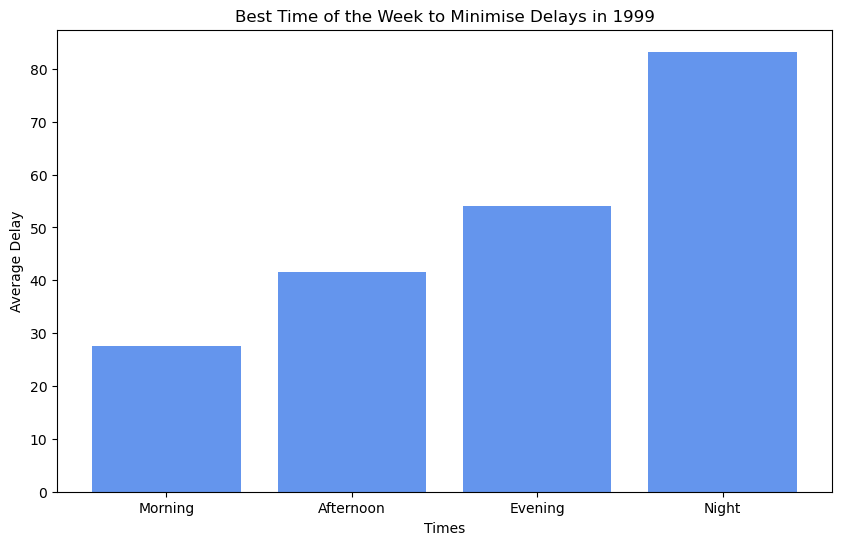

  DateandTime  TotalDelay
2     Morning   27.558570
0   Afternoon   41.532855
1     Evening   54.098327
3       Night   83.253917


In [36]:
#Filtering ontime_df for 1999, where there is no cancellation and diversion. By the above definition, TotalDelay will be set to more than 0
filter_for_1999 = p2aontime_df[(p2aontime_df['Year'] == 1999) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

#Grouping it by 'DateandTime', and calculating the average of 'TotalDelay' for each 'DateandTime'. Resetting the index to default.
grouped1999 = filter_for_1999.groupby('DateandTime')['TotalDelay'].mean().reset_index()

#Arranging it by ascending order
best_times = grouped1999.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_times['DateandTime'], best_times['TotalDelay'], color='cornflowerblue')
plt.xlabel('Times')
plt.ylabel('Average Delay')
plt.title('Best Time of the Week to Minimise Delays in 1999')
plt.show()

print(best_times)

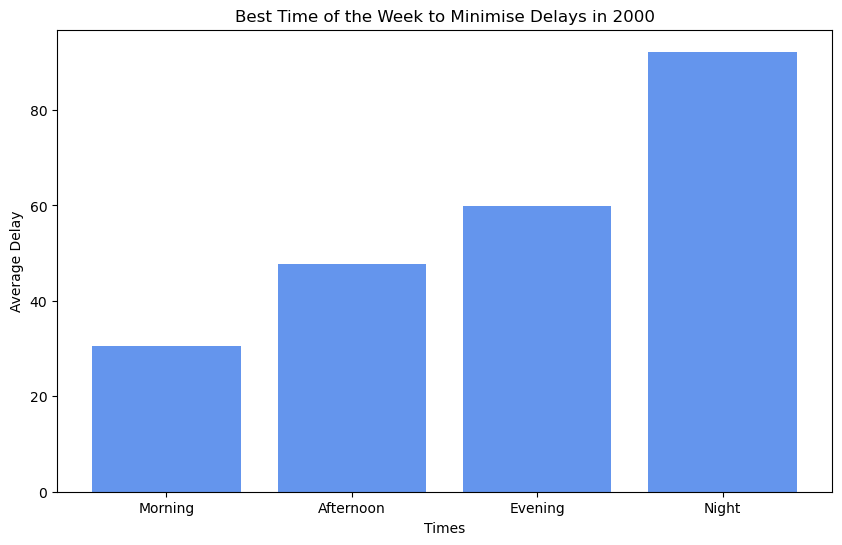

  DateandTime  TotalDelay
2     Morning   30.505175
0   Afternoon   47.830892
1     Evening   59.865334
3       Night   92.229065


In [37]:
#Repeating the same for 2000
filter_for_2000 = p2aontime_df[(p2aontime_df['Year'] == 2000) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped2000 = filter_for_2000.groupby('DateandTime')['TotalDelay'].mean().reset_index()

best_times2 = grouped2000.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_times2['DateandTime'], best_times2['TotalDelay'], color='cornflowerblue')
plt.xlabel('Times')
plt.ylabel('Average Delay')
plt.title('Best Time of the Week to Minimise Delays in 2000')
plt.show()

print(best_times2)

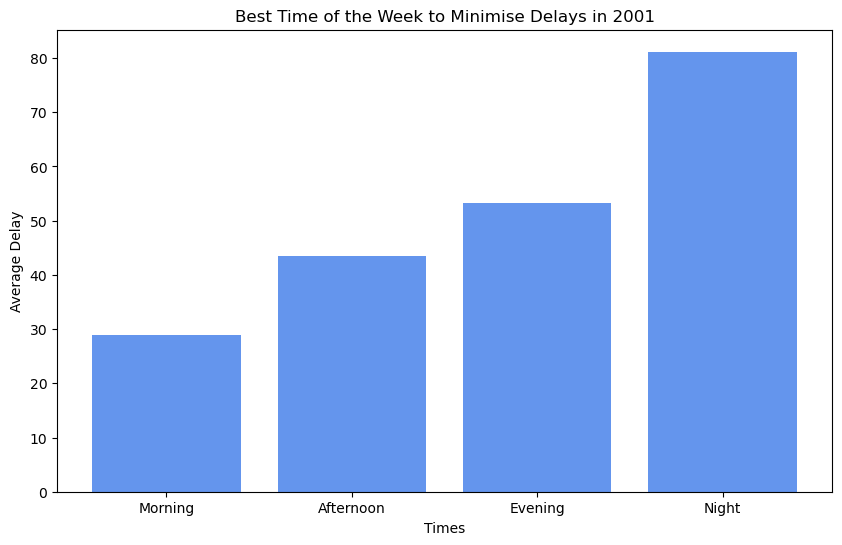

  DateandTime  TotalDelay
2     Morning   28.906064
0   Afternoon   43.395060
1     Evening   53.273452
3       Night   81.162467


In [38]:
#Repeating the same for 2001
filter_for_2001 = p2aontime_df[(p2aontime_df['Year'] == 2001) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped2001 = filter_for_2001.groupby('DateandTime')['TotalDelay'].mean().reset_index()

best_times3 = grouped2001.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_times3['DateandTime'], best_times3['TotalDelay'], color='cornflowerblue')
plt.xlabel('Times')
plt.ylabel('Average Delay')
plt.title('Best Time of the Week to Minimise Delays in 2001')
plt.show()

print(best_times3)

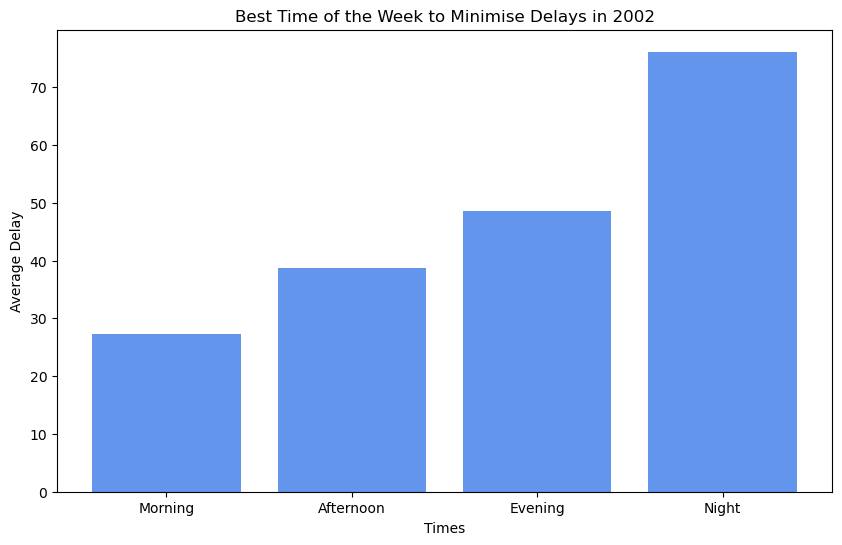

  DateandTime  TotalDelay
2     Morning   27.207104
0   Afternoon   38.733869
1     Evening   48.496557
3       Night   76.141024


In [39]:
#Repeating the same for 2002
filter_for_2002 = p2aontime_df[(p2aontime_df['Year'] == 2002) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped2002 = filter_for_2002.groupby('DateandTime')['TotalDelay'].mean().reset_index()

best_times4 = grouped2002.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_times4['DateandTime'], best_times4['TotalDelay'], color='cornflowerblue')
plt.xlabel('Times')
plt.ylabel('Average Delay')
plt.title('Best Time of the Week to Minimise Delays in 2002')
plt.show()

print(best_times4)

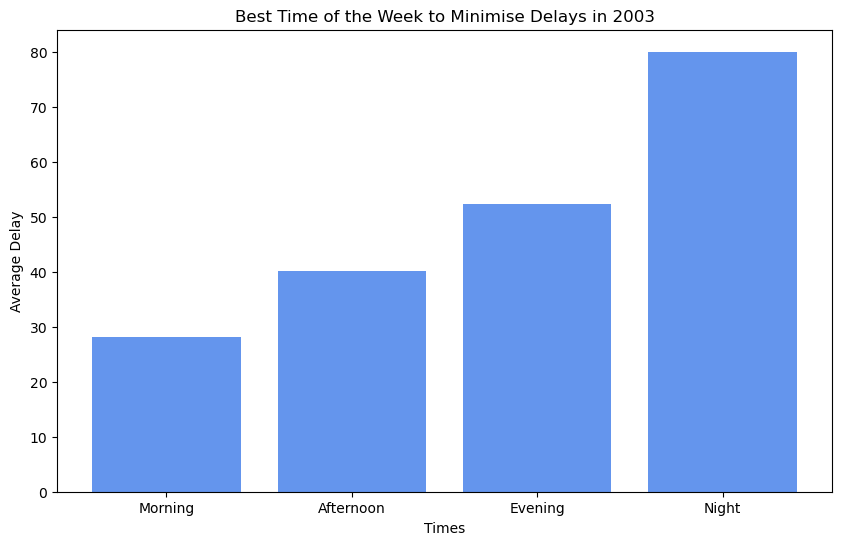

  DateandTime  TotalDelay
2     Morning   28.230306
0   Afternoon   40.224973
1     Evening   52.406395
3       Night   80.100461


In [40]:
#Repeating the same for 2003
filter_for_2003 = p2aontime_df[(p2aontime_df['Year'] == 2003) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped2003 = filter_for_2003.groupby('DateandTime')['TotalDelay'].mean().reset_index()

best_times5 = grouped2003.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_times5['DateandTime'], best_times5['TotalDelay'], color='cornflowerblue')
plt.xlabel('Times')
plt.ylabel('Average Delay')
plt.title('Best Time of the Week to Minimise Delays in 2003')
plt.show()

print(best_times5)

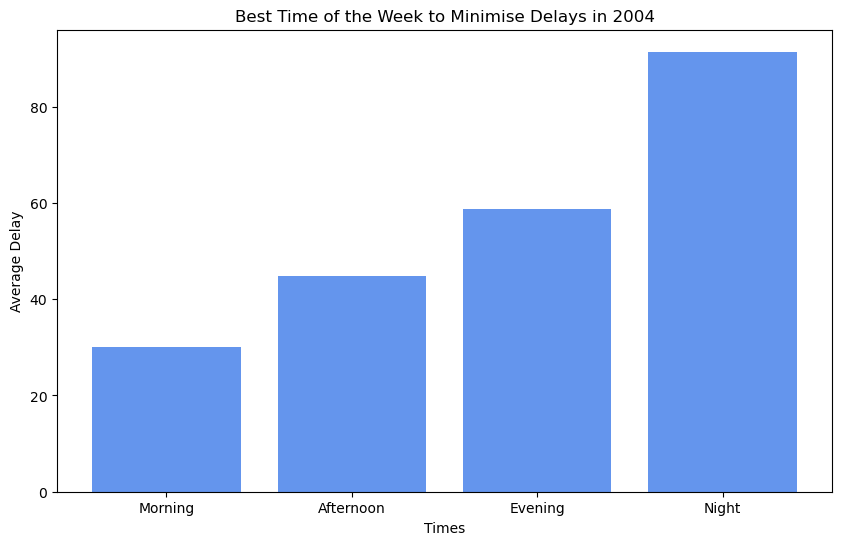

  DateandTime  TotalDelay
2     Morning   30.131613
0   Afternoon   44.878541
1     Evening   58.824869
3       Night   91.431880


In [41]:
#Repeating the same for 2004
filter_for_2004 = p2aontime_df[(p2aontime_df['Year'] == 2004) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped2004 = filter_for_2004.groupby('DateandTime')['TotalDelay'].mean().reset_index()

best_times6 = grouped2004.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_times6['DateandTime'], best_times6['TotalDelay'], color='cornflowerblue')
plt.xlabel('Times')
plt.ylabel('Average Delay')
plt.title('Best Time of the Week to Minimise Delays in 2004')
plt.show()

print(best_times6)

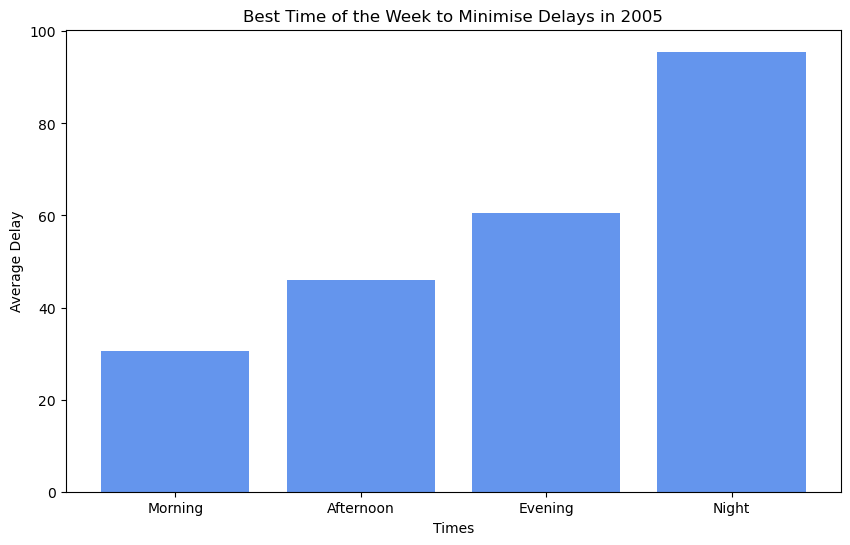

  DateandTime  TotalDelay
2     Morning   30.486896
0   Afternoon   46.090315
1     Evening   60.541924
3       Night   95.569213


In [42]:
#Repeating the same for 2005
filter_for_2005 = p2aontime_df[(p2aontime_df['Year'] == 2005) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped2005 = filter_for_2005.groupby('DateandTime')['TotalDelay'].mean().reset_index()

best_times7 = grouped2005.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_times7['DateandTime'], best_times7['TotalDelay'], color='cornflowerblue')
plt.xlabel('Times')
plt.ylabel('Average Delay')
plt.title('Best Time of the Week to Minimise Delays in 2005')
plt.show()

print(best_times7)

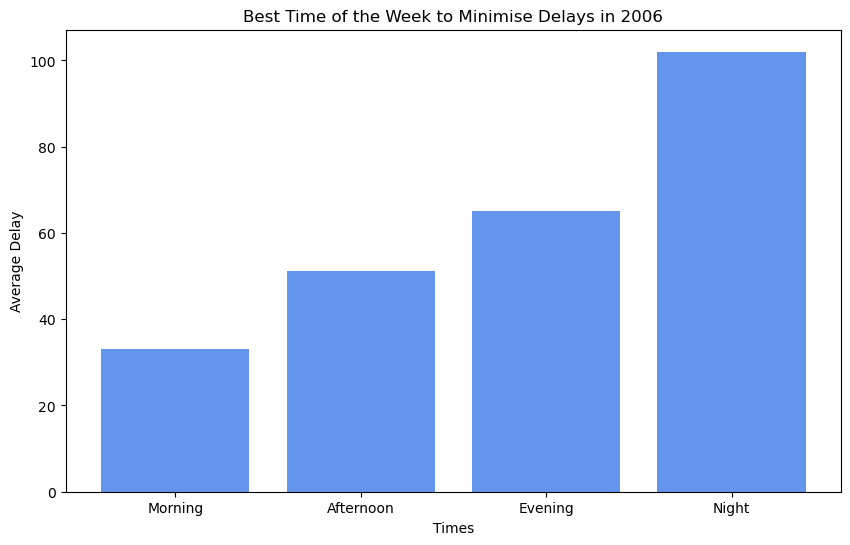

  DateandTime  TotalDelay
2     Morning   33.141810
0   Afternoon   51.075627
1     Evening   65.085174
3       Night  102.019143


In [43]:
#Repeating the same for 2006
filter_for_2006 = p2aontime_df[(p2aontime_df['Year'] == 2006) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped2006 = filter_for_2006.groupby('DateandTime')['TotalDelay'].mean().reset_index()

best_times8 = grouped2006.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_times8['DateandTime'], best_times8['TotalDelay'], color='cornflowerblue')
plt.xlabel('Times')
plt.ylabel('Average Delay')
plt.title('Best Time of the Week to Minimise Delays in 2006')
plt.show()

print(best_times8)

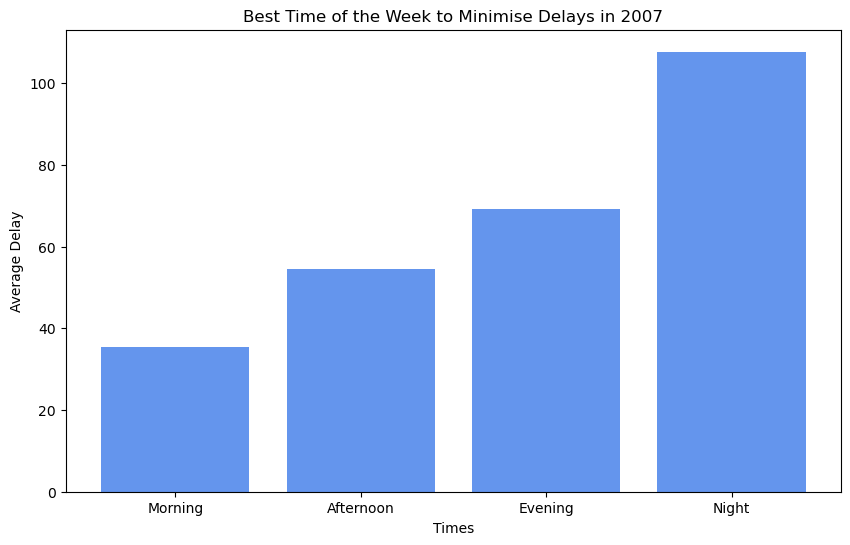

  DateandTime  TotalDelay
2     Morning   35.319772
0   Afternoon   54.388424
1     Evening   69.292599
3       Night  107.671932


In [44]:
#Repeating the same for 2007
filter_for_2007 = p2aontime_df[(p2aontime_df['Year'] == 2007) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped2007 = filter_for_2007.groupby('DateandTime')['TotalDelay'].mean().reset_index()

best_times9 = grouped2007.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_times9['DateandTime'], best_times9['TotalDelay'], color='cornflowerblue')
plt.xlabel('Times')
plt.ylabel('Average Delay')
plt.title('Best Time of the Week to Minimise Delays in 2007')
plt.show()

print(best_times9)

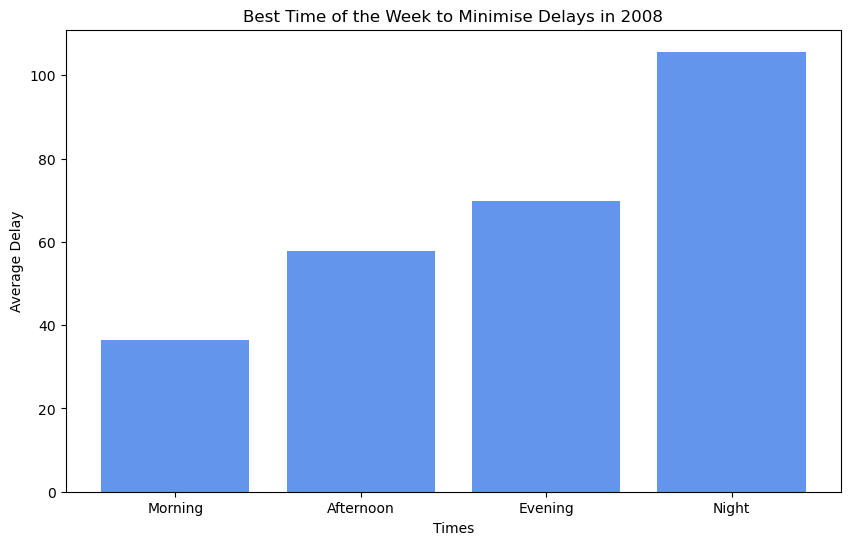

  DateandTime  TotalDelay
2     Morning   36.361058
0   Afternoon   57.833644
1     Evening   69.811703
3       Night  105.674142


In [45]:
#Repeating the same for 2008
filter_for_2008 = p2aontime_df[(p2aontime_df['Year'] == 2008) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped2008 = filter_for_2008.groupby('DateandTime')['TotalDelay'].mean().reset_index()

best_times10 = grouped2008.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_times10['DateandTime'], best_times10['TotalDelay'], color='cornflowerblue')
plt.xlabel('Times')
plt.ylabel('Average Delay')
plt.title('Best Time of the Week to Minimise Delays in 2008')
plt.show()

print(best_times10)

### Best Days of the week to minimise delays each year:

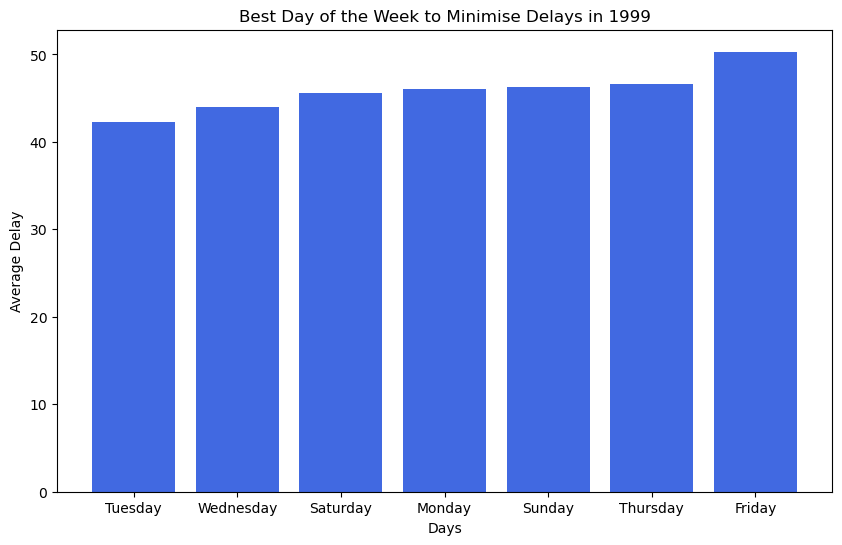

   DayOfWeek  TotalDelay
5    Tuesday   42.229865
6  Wednesday   43.974199
2   Saturday   45.564078
1     Monday   46.079702
3     Sunday   46.306343
4   Thursday   46.637118
0     Friday   50.306081


In [46]:
#Filtering ontime_df for 1999, where there is no cancellation and diversion. By the same definition, TotalDelay will be set to more than 0
filtered_for_1999 = p2aontime_df[(p2aontime_df['Year'] == 1999) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

# #Grouping it by 'DayOfWeek', and calculating the average of 'TotalDelay' for each 'DayOfWeek'. Resetting the index to default.
grouped_for_1999 = filtered_for_1999.groupby('DayOfWeek')['TotalDelay'].mean().reset_index()

# #Arranging it by ascending order
best_day = grouped_for_1999.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_day['DayOfWeek'], best_day['TotalDelay'], color='royalblue')
plt.xlabel('Days')
plt.ylabel('Average Delay')
plt.title('Best Day of the Week to Minimise Delays in 1999')
plt.show()

print(best_day)

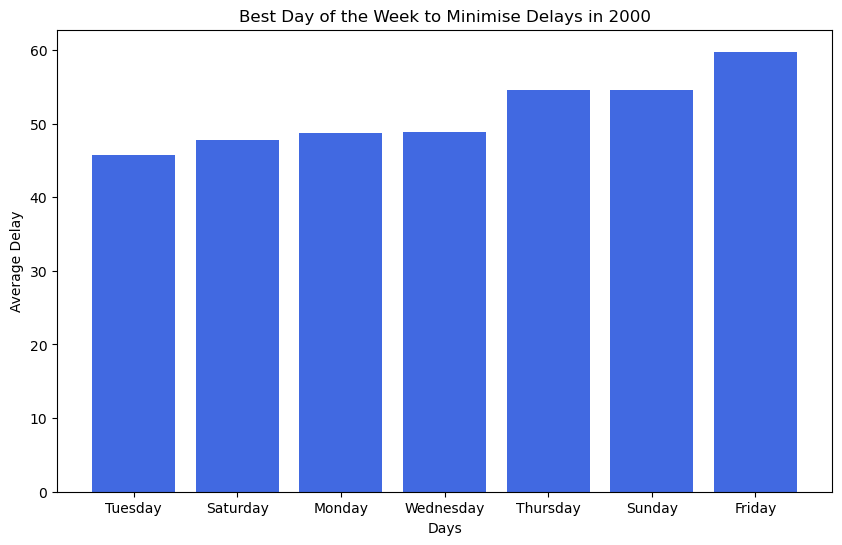

   DayOfWeek  TotalDelay
5    Tuesday   45.690877
2   Saturday   47.771603
1     Monday   48.760965
6  Wednesday   48.824469
4   Thursday   54.554857
3     Sunday   54.601661
0     Friday   59.755521


In [47]:
#Repeat the same for 2000
filtered_for_2000 = p2aontime_df[(p2aontime_df['Year'] == 2000) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped_for_2000 = filtered_for_2000.groupby('DayOfWeek')['TotalDelay'].mean().reset_index()

best_day2 = grouped_for_2000.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_day2['DayOfWeek'], best_day2['TotalDelay'], color='royalblue')
plt.xlabel('Days')
plt.ylabel('Average Delay')
plt.title('Best Day of the Week to Minimise Delays in 2000')
plt.show()

print(best_day2)

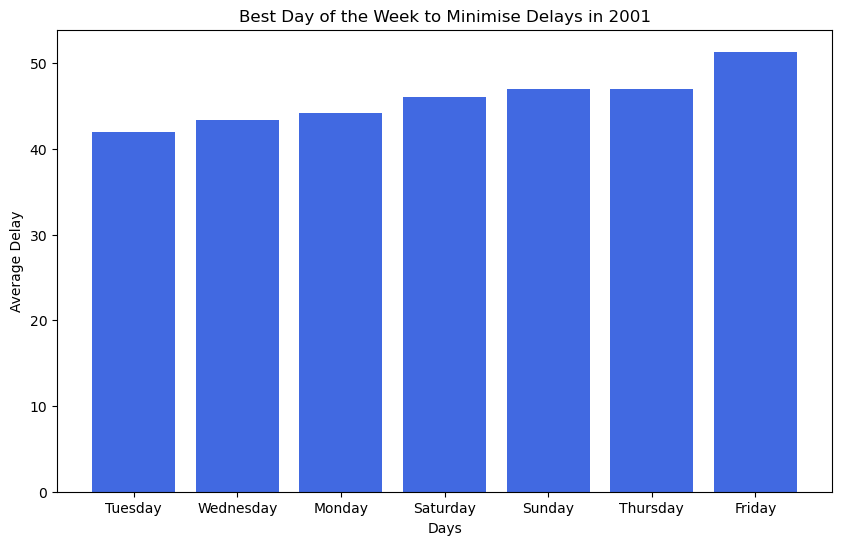

   DayOfWeek  TotalDelay
5    Tuesday   41.927041
6  Wednesday   43.417661
1     Monday   44.136920
2   Saturday   46.036314
3     Sunday   46.933352
4   Thursday   47.003514
0     Friday   51.332478


In [48]:
#Repeat the same for 2001
filtered_for_2001 = p2aontime_df[(p2aontime_df['Year'] == 2001) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped_for_2001 = filtered_for_2001.groupby('DayOfWeek')['TotalDelay'].mean().reset_index()

best_day3 = grouped_for_2001.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_day3['DayOfWeek'], best_day3['TotalDelay'], color='royalblue')
plt.xlabel('Days')
plt.ylabel('Average Delay')
plt.title('Best Day of the Week to Minimise Delays in 2001')
plt.show()

print(best_day3)

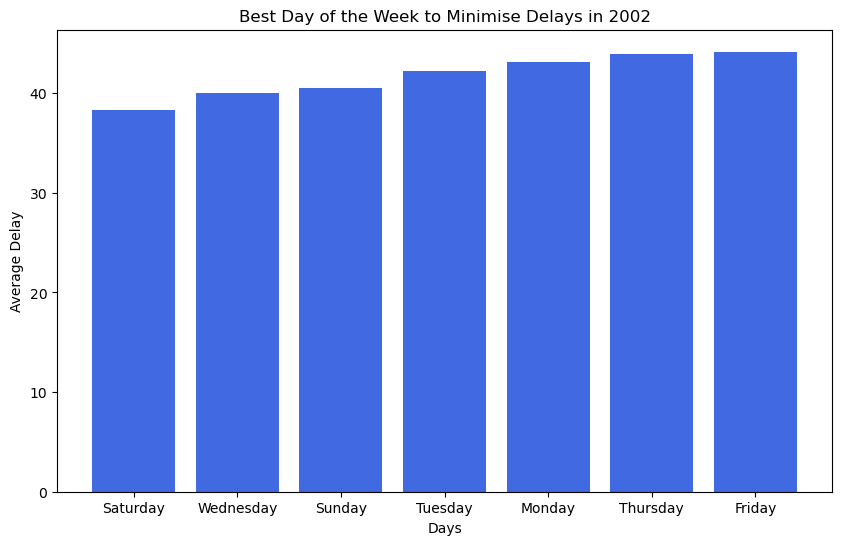

   DayOfWeek  TotalDelay
2   Saturday   38.293403
6  Wednesday   39.998433
3     Sunday   40.485612
5    Tuesday   42.187002
1     Monday   43.155060
4   Thursday   43.931729
0     Friday   44.164869


In [49]:
#Repeat the same for 2002
filtered_for_2002 = p2aontime_df[(p2aontime_df['Year'] == 2002) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped_for_2002 = filtered_for_2002.groupby('DayOfWeek')['TotalDelay'].mean().reset_index()

best_day4 = grouped_for_2002.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_day4['DayOfWeek'], best_day4['TotalDelay'], color='royalblue')
plt.xlabel('Days')
plt.ylabel('Average Delay')
plt.title('Best Day of the Week to Minimise Delays in 2002')
plt.show()

print(best_day4)

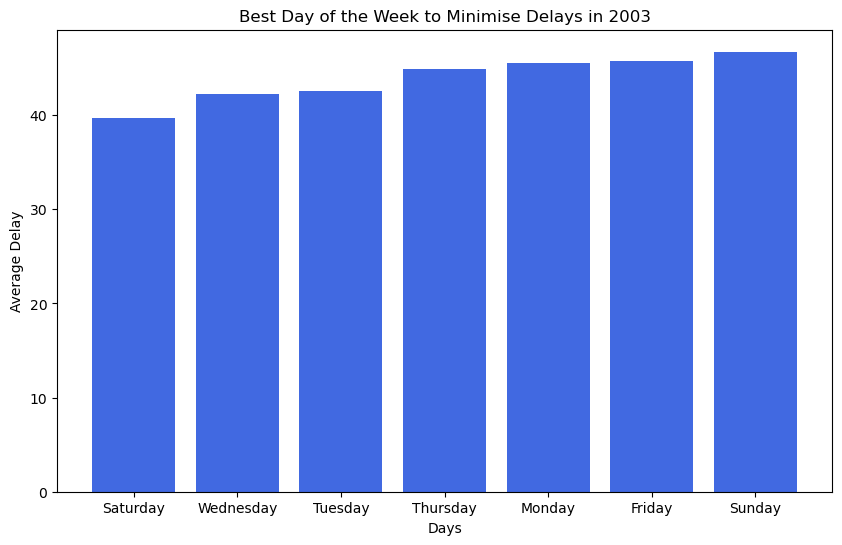

   DayOfWeek  TotalDelay
2   Saturday   39.745890
6  Wednesday   42.214960
5    Tuesday   42.613998
4   Thursday   44.924417
1     Monday   45.542862
0     Friday   45.727499
3     Sunday   46.746525


In [50]:
#Repeat the same for 2003
filtered_for_2003 = p2aontime_df[(p2aontime_df['Year'] == 2003) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped_for_2003 = filtered_for_2003.groupby('DayOfWeek')['TotalDelay'].mean().reset_index()

best_day5 = grouped_for_2003.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_day5['DayOfWeek'], best_day5['TotalDelay'], color='royalblue')
plt.xlabel('Days')
plt.ylabel('Average Delay')
plt.title('Best Day of the Week to Minimise Delays in 2003')
plt.show()

print(best_day5)

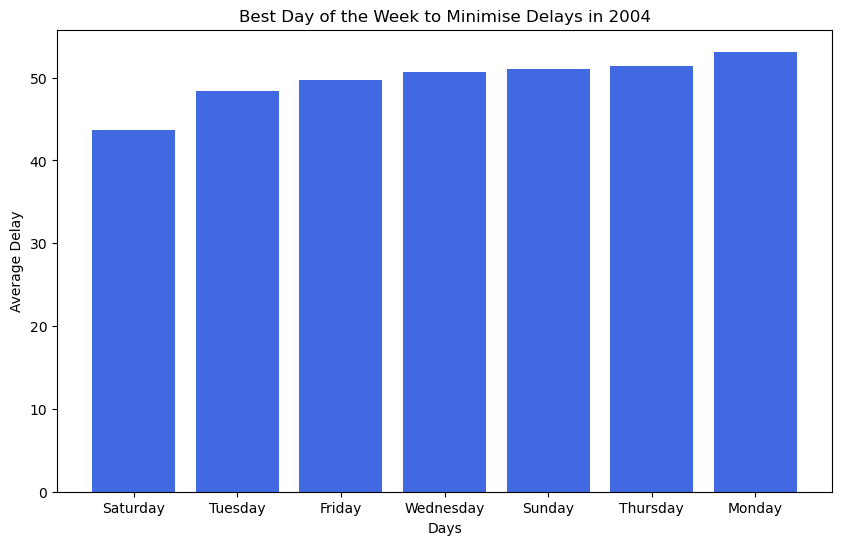

   DayOfWeek  TotalDelay
2   Saturday   43.709232
5    Tuesday   48.383962
0     Friday   49.677975
6  Wednesday   50.745509
3     Sunday   51.016493
4   Thursday   51.375134
1     Monday   53.135055


In [51]:
#Repeat the same for 2004
filtered_for_2004 = p2aontime_df[(p2aontime_df['Year'] == 2004) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped_for_2004 = filtered_for_2004.groupby('DayOfWeek')['TotalDelay'].mean().reset_index()

best_day6 = grouped_for_2004.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_day6['DayOfWeek'], best_day6['TotalDelay'], color='royalblue')
plt.xlabel('Days')
plt.ylabel('Average Delay')
plt.title('Best Day of the Week to Minimise Delays in 2004')
plt.show()

print(best_day6)

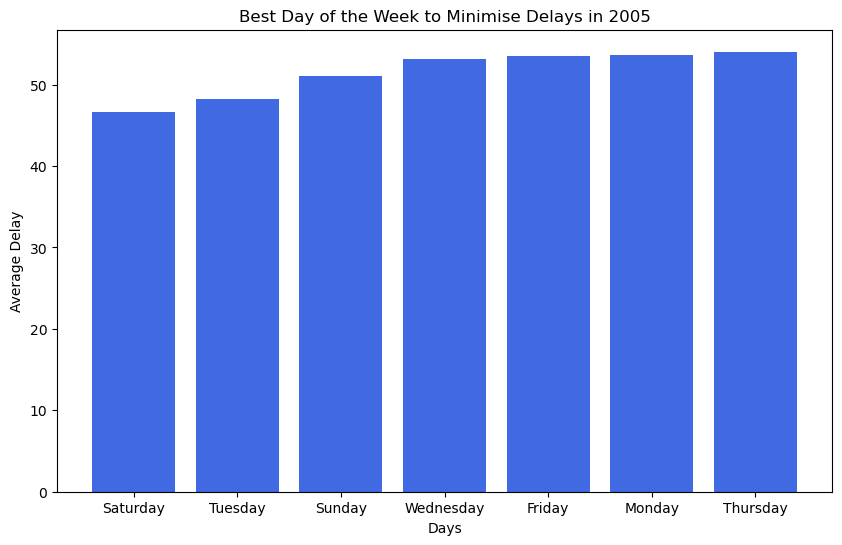

   DayOfWeek  TotalDelay
2   Saturday   46.648915
5    Tuesday   48.204931
3     Sunday   51.038989
6  Wednesday   53.142000
0     Friday   53.471024
1     Monday   53.604969
4   Thursday   54.047905


In [52]:
#Repeat the same for 2005
filtered_for_2005 = p2aontime_df[(p2aontime_df['Year'] == 2005) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped_for_2005 = filtered_for_2005.groupby('DayOfWeek')['TotalDelay'].mean().reset_index()

best_day7 = grouped_for_2005.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_day7['DayOfWeek'], best_day7['TotalDelay'], color='royalblue')
plt.xlabel('Days')
plt.ylabel('Average Delay')
plt.title('Best Day of the Week to Minimise Delays in 2005')
plt.show()

print(best_day7)

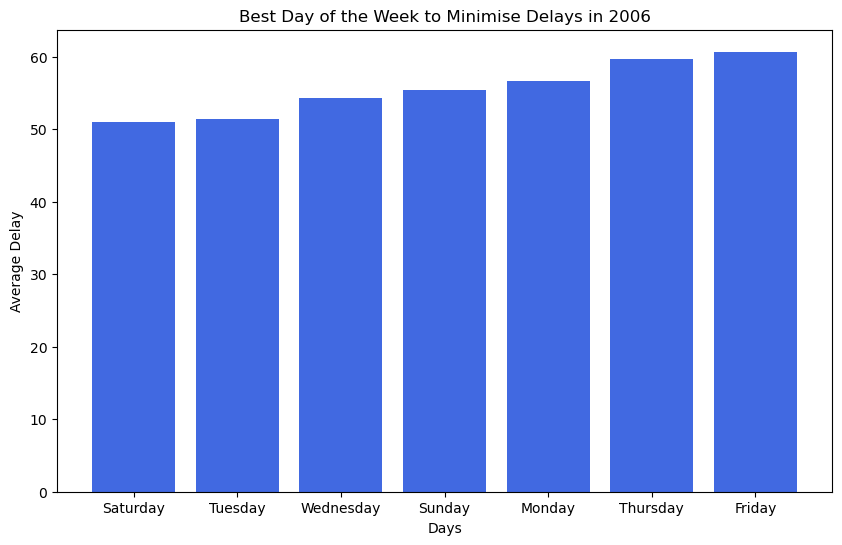

   DayOfWeek  TotalDelay
2   Saturday   50.934888
5    Tuesday   51.430908
6  Wednesday   54.235017
3     Sunday   55.340813
1     Monday   56.579132
4   Thursday   59.714016
0     Friday   60.666450


In [53]:
#Repeat the same for 2006
filtered_for_2006 = p2aontime_df[(p2aontime_df['Year'] == 2006) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped_for_2006 = filtered_for_2006.groupby('DayOfWeek')['TotalDelay'].mean().reset_index()

best_day8 = grouped_for_2006.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_day8['DayOfWeek'], best_day8['TotalDelay'], color='royalblue')
plt.xlabel('Days')
plt.ylabel('Average Delay')
plt.title('Best Day of the Week to Minimise Delays in 2006')
plt.show()

print(best_day8)

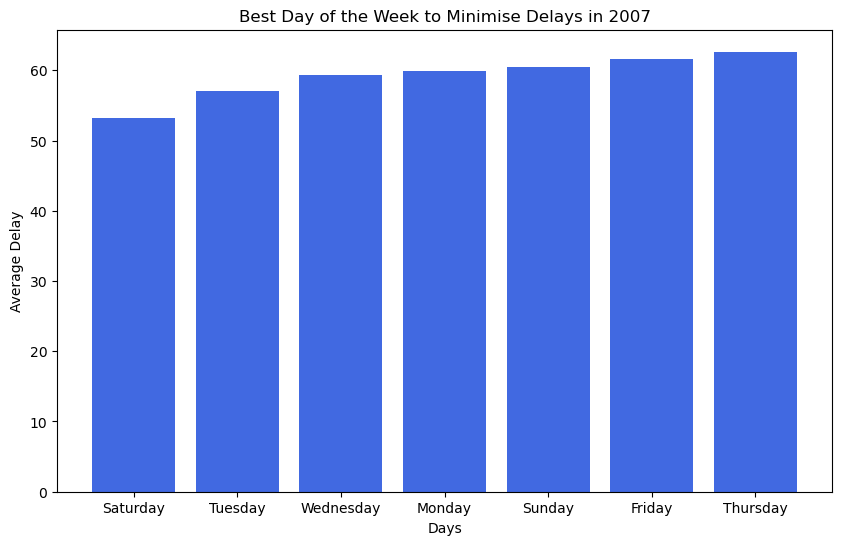

   DayOfWeek  TotalDelay
2   Saturday   53.151351
5    Tuesday   56.988712
6  Wednesday   59.287893
1     Monday   59.832454
3     Sunday   60.420164
0     Friday   61.640130
4   Thursday   62.639615


In [54]:
#Repeat the same for 2007
filtered_for_2007 = p2aontime_df[(p2aontime_df['Year'] == 2007) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped_for_2007 = filtered_for_2007.groupby('DayOfWeek')['TotalDelay'].mean().reset_index()

best_day9 = grouped_for_2007.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_day9['DayOfWeek'], best_day9['TotalDelay'], color='royalblue')
plt.xlabel('Days')
plt.ylabel('Average Delay')
plt.title('Best Day of the Week to Minimise Delays in 2007')
plt.show()

print(best_day9)

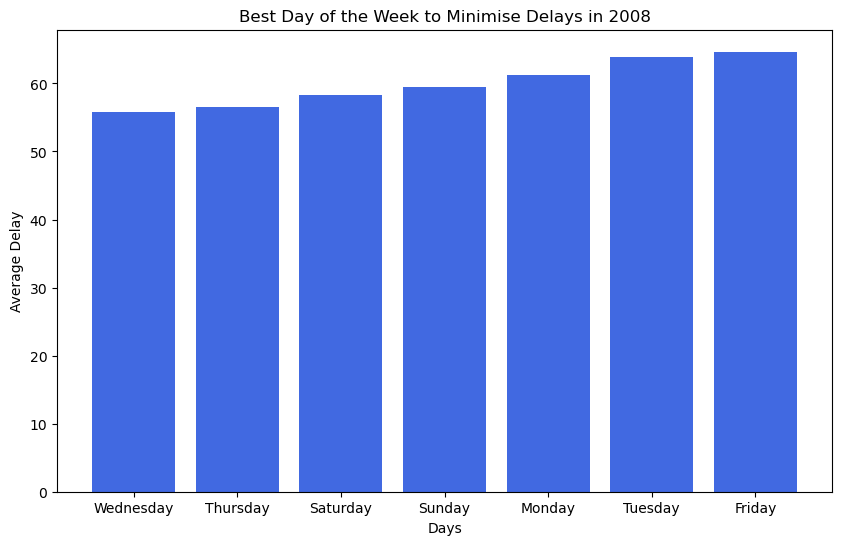

   DayOfWeek  TotalDelay
6  Wednesday   55.819496
4   Thursday   56.598621
2   Saturday   58.227411
3     Sunday   59.453140
1     Monday   61.201231
5    Tuesday   63.811869
0     Friday   64.657381


In [55]:
#Repeat the same for 2008
filtered_for_2008 = p2aontime_df[(p2aontime_df['Year'] == 2008) & 
                        (p2aontime_df['Cancelled'] == 0) & 
                        (p2aontime_df['Diverted'] == 0) & 
                        (p2aontime_df['TotalDelay'] > 0)]

grouped_for_2008 = filtered_for_2008.groupby('DayOfWeek')['TotalDelay'].mean().reset_index()

best_day10 = grouped_for_2008.sort_values(by='TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(best_day10['DayOfWeek'], best_day10['TotalDelay'], color='royalblue')
plt.xlabel('Days')
plt.ylabel('Average Delay')
plt.title('Best Day of the Week to Minimise Delays in 2008')
plt.show()

print(best_day10)

## Part 2b) Evaluate whether older planes suffer more delays on a year-to-year basis.

### Data cleaning for planes_df

In [56]:
#Replacing blank cells with NA, before removing it
planes_df.replace('N/A', np.NaN)
planes_df.dropna()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986.0
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999.0
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992.0
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002.0
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992.0
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0


#### Creating a new dataframe from ontime_df and planes_df and cleaning it

In [57]:
#Filtering for ontime_df to select necessary columns
ontime_subset = ontime_df[['Year', 'TailNum', 'TotalDelay']]

ontime_subset = ontime_subset.dropna(subset=['TailNum', 'TotalDelay'])
ontime_subset.isna().sum()

Year          0
TailNum       0
TotalDelay    0
dtype: int64

In [58]:
#Filtering for planes_df to select necessary columns and remaining 'tailnum' to 'TailNum' to match with ontime_subset. 'year' renamed to 'manuf_year' as the manufacturing year to reuduce confusion with 'Year'
planes_subset = planes_df[['tailnum', 'year']].rename(columns={'tailnum': 'TailNum', 'year': 'manuf_year'})

#Setting 'TailNum' as the index for both 
ontime_subset.set_index('TailNum', inplace=True)
planes_subset.set_index('TailNum', inplace=True)

#Joining both via Leftjoin
older_planes_suffer = ontime_subset.join(planes_subset, how='left')

#Resetting index to turn 'TailNum' into a column
older_planes_suffer.reset_index(inplace=True)

In [59]:
#Dropping further NA found in 'manuf_year'
older_planes_suffer = older_planes_suffer.dropna(subset=['manuf_year'])
older_planes_suffer.isna().sum()

TailNum       0
Year          0
TotalDelay    0
manuf_year    0
dtype: int64

In [60]:
# Changing 'manuf_year' column into integer as the range() function only works with integer. 'manuf_year' was previously a float
older_planes_suffer['manuf_year'] = older_planes_suffer['manuf_year'].astype(int)

#Finding the range of manufacturing year to categorise it into Newer and Older planes
range(min(older_planes_suffer['manuf_year']), max(older_planes_suffer['manuf_year']))

range(0, 2008)

In [61]:
#Doesn't make sense that a manufacturing year is 0, so we filter it out
older_planes_suffer = older_planes_suffer[older_planes_suffer['manuf_year'] != 0]

#Finding updated range
range(min(older_planes_suffer['manuf_year']), max(older_planes_suffer['manuf_year']))

range(1956, 2008)

In [62]:
#Planes that are 10 years old and less from the manufacturing year is considered as New. Eg, 1998-2008: New / Less than 1998: Old
threshold = 1998

#'YearCategory' column created to store Newer/Older categorisation
older_planes_suffer['YearCategory'] = np.where(older_planes_suffer['manuf_year'] < threshold, 'Older', 'Newer')
print(older_planes_suffer)

         TailNum  Year  TotalDelay  manuf_year YearCategory
1562247   N10156  2004        49.0        2004        Newer
1562248   N10156  2004        54.0        2004        Newer
1562249   N10156  2004       -15.0        2004        Newer
1562250   N10156  2004        32.0        2004        Newer
1562251   N10156  2004       -24.0        2004        Newer
...          ...   ...         ...         ...          ...
58619402  N999DN  2008       -13.0        1992        Older
58619403  N999DN  2008        -7.0        1992        Older
58619404  N999DN  2008       -11.0        1992        Older
58619405  N999DN  2008       -30.0        1992        Older
58619406  N999DN  2008        44.0        1992        Older

[32639544 rows x 5 columns]


#### Answering the question:

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


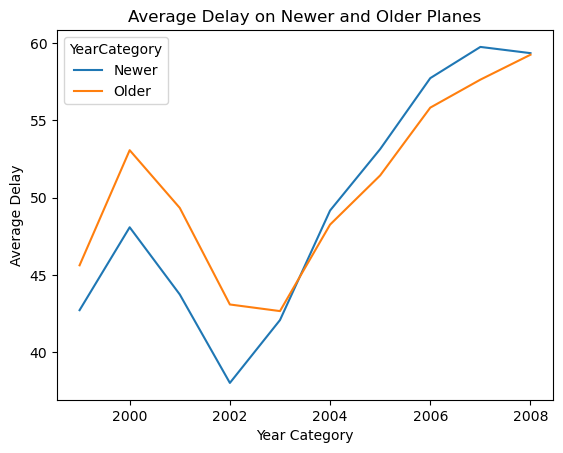

    Year YearCategory  TotalDelay
6   2002        Newer   38.027989
8   2003        Newer   42.088499
9   2003        Older   42.669067
0   1999        Newer   42.729037
7   2002        Older   43.096490
4   2001        Newer   43.743958
1   1999        Older   45.628117
2   2000        Newer   48.084802
11  2004        Older   48.257960
10  2004        Newer   49.167754
5   2001        Older   49.336732
13  2005        Older   51.436081
3   2000        Older   53.065496
12  2005        Newer   53.137505
15  2006        Older   55.815726
17  2007        Older   57.624447
14  2006        Newer   57.722024
19  2008        Older   59.233851
18  2008        Newer   59.336467
16  2007        Newer   59.738519


In [63]:
#Filtering by TotalDelay > 0 
filter_p2b = older_planes_suffer[older_planes_suffer['TotalDelay'] > 0]

#Grouping it by 'Year' and 'YearCategory', and calculating the average of 'TotalDelay'. Resetting the index to default.
p2b = filter_p2b.groupby(['Year', 'YearCategory'])['TotalDelay'].mean().reset_index()

#Arranging it by ascending order
p2b = p2b.sort_values(by='TotalDelay')

sns.lineplot(x='Year', y='TotalDelay', data=p2b, hue='YearCategory')
plt.xlabel('Year Category')
plt.ylabel('Average Delay')
plt.title('Average Delay on Newer and Older Planes')
plt.show()

print(p2b)

## Part 2c) Fit a logistic regression model for the probability of diverted US flights for each year. Visualize the coefficients across years.

## Data cleaning for airports_df and creating a new dataframe for Part 2c)

In [37]:
#Filtering for ontime_df to select necessary columns
subset_ontime = ontime_df[['Year', 'Diverted', 'Dates', 'CRSDepTime', 'CRSArrTime','Distance','UniqueCarrier','Origin','Dest']]

#Filtering for airports_df to select necessary columns
subset_airports = airports_df[['iata', 'lat', 'long']]

#Merging both dataframes by Origin and iata via Leftjoin. left_on refers to the left dataframe - subset_ontime while right_on refers to the right dataframe - subset_airports
probability = pd.merge(subset_ontime, subset_airports, left_on='Origin', right_on='iata', how='left')

#Remove the 'iata' column for Origin
probability.drop(columns=['iata'], inplace=True)

#Rename the coordinates to respective longitude and latitude of Origin
probability.rename(columns={'lat': 'Lat_Origin', 'long': 'Long_Origin'}, inplace=True)

#Merging both dataframes by Dest and iata via Leftjoin. left_on refers to the left dataframe - subset_ontime while right_on refers to the right dataframe - subset_airports
probability = pd.merge(probability, subset_airports, left_on='Dest', right_on='iata', how='left')

#Remove the 'iata' column for Dest
probability.drop(columns=['iata'], inplace=True)

#Rename the coordinates to respective longitude and latitude of Dest
probability.rename(columns={'lat': 'Lat_Dest', 'long': 'Long_Dest'}, inplace=True)

#Remove the 'Origin' and 'Dest' columns
probability.drop(columns=['Origin', 'Dest'], inplace=True)
#inplace=True to remove columns directly from 'probability' dataframe and not creating a new one

In [40]:
#Changing 'Dates' into string, before removing '-' so that it only contains the number
probability['Dates'] = probability['Dates'].dt.strftime('%Y-%m-%d')
probability['Dates'] = probability['Dates'].str.replace('-', '')
probability['Dates'] = probability['Dates'].astype('int64').astype(dtype='int64')
#Changing dtype to integer to solve TypeError: Converting from datetime64[ns] to int32 is not supported. Do obj.astype('int64').astype(dtype) instead

In [42]:
print(probability)

          Year  Diverted     Dates  CRSDepTime  CRSArrTime  Distance  \
0         1999         0  19990127        1908        2005       198   
1         1999         0  19990128        1908        2005       198   
2         1999         0  19990129        1908        2005       198   
3         1999         0  19990131        1908        2005       198   
4         1999         0  19990101        1535        1645       257   
...        ...       ...       ...         ...         ...       ...   
60192825  2008         0  20080417        1025        1237       752   
60192826  2008         0  20080417        1320        1524       752   
60192827  2008         0  20080417        1335        1553       752   
60192828  2008         0  20080417        1935        2141       752   
60192829  2008         0  20080417         615         754       430   

         UniqueCarrier  Lat_Origin  Long_Origin   Lat_Dest  Long_Dest  
0                   US   37.505167   -77.319667  39.871953 -75.

In [43]:
#Making sure that there is diversion in the data
diverted_rows = probability[probability['Diverted'] == 1]     
print(diverted_rows)

          Year  Diverted     Dates  CRSDepTime  CRSArrTime  Distance  \
93        1999         1  19990128         810         920       257   
134       1999         1  19990109        1139        1249       257   
184       1999         1  19990128         635         911       992   
356       1999         1  19990114        1210        2000      2378   
440       1999         1  19990106        2205         614      2521   
...        ...       ...       ...         ...         ...       ...   
60187084  2008         1  20080412        1540        1903      1180   
60187098  2008         1  20080412        1505        1815      1237   
60190699  2008         1  20080415         730        1050      2611   
60190788  2008         1  20080415         800        1137      1249   
60191364  2008         1  20080416         900        1040      1891   

         UniqueCarrier  Lat_Origin  Long_Origin   Lat_Dest   Long_Dest  
93                  US   43.118866   -77.672384  39.871953  -7

### Fitting the logistic regression model for each year:

In [80]:
#For year 1999
#Filtering 'probability' to contain only 1999
model1 = probability[(probability['Year'] == 1999)]  

### ------Pre-Processing Pipelines------
#Focusing the features listed in the question
features1 = ['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']
X1 = model1[features1].copy()

#Target variable: Diverted
y1 = model1['Diverted'].copy()

#Selecting features that are numerical
numericalfeatures1 =['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']

numericaltransformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer()),               #For missing values
    ('scaler', StandardScaler())])              #For scaling

#Selecting features that are categorical
categoricalfeatures1 = ['UniqueCarrier']

categoricaltransformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer()),                             #For missing values
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))])     #OneHotEncoder to create dummy variables

#Merge numerical and categorical features
preprocessing1 = ColumnTransformer(
    transformers=[
        ('numerical', numericaltransformer1, numericalfeatures1),            #The transformer will be applied onto the features
        ('categorical', categoricaltransformer1, categoricalfeatures1)])

### ------Training and Testing Sets------
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.5, random_state=1)

### ------Parameters------
param_grid = {
        'preprocessing1__numerical__imputer__strategy': ['mean', 'median'],
        'preprocessing1__categorical__imputer__strategy': ['constant', 'most_frequent']
}

### ------Logistic Regression------
pipe_LR1 = Pipeline(steps=[('preprocessing1', preprocessing1),
                            ('pipe_LR1', LogisticRegression(max_iter=10000, penalty='none'))])

grid_LR1 = GridSearchCV(pipe_LR1, param_grid=param_grid, error_score='raise')
grid_LR1.fit(X_train1, y_train1)

y_score1 = grid_LR1.predict_proba(X_train1)[:, 1] 

#To create ROC curve and to calculate the AUC
fpr1, tpr1, _ = roc_curve(y_train1, y_score1)
auc1 = roc_auc_score(y_train1, y_score1)

#To calculate coefficients and get features for 1999
coefficient1 = grid_LR1.best_estimator_.named_steps['pipe_LR1'].coef_
feature1 = grid_LR1.best_estimator_.named_steps['preprocessing1'].get_feature_names_out()

print(feature1)
print(coefficient1)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

['numerical__Dates' 'numerical__CRSDepTime' 'numerical__CRSArrTime'
 'numerical__Distance' 'numerical__Lat_Origin' 'numerical__Long_Origin'
 'numerical__Lat_Dest' 'numerical__Long_Dest'
 'categorical__UniqueCarrier_AA' 'categorical__UniqueCarrier_AS'
 'categorical__UniqueCarrier_CO' 'categorical__UniqueCarrier_DL'
 'categorical__UniqueCarrier_HP' 'categorical__UniqueCarrier_NW'
 'categorical__UniqueCarrier_TW' 'categorical__UniqueCarrier_UA'
 'categorical__UniqueCarrier_US' 'categorical__UniqueCarrier_WN']
[[-0.2164422  -0.05229458  0.12391479  0.37676219  0.03092397  0.09063153
   0.11529277  0.16056519 -0.41996113  0.17859383 -0.68179062 -0.84236882
  -0.90786092 -0.39828721 -0.76307119 -0.71922262 -0.46828171 -0.52972329]]


In [45]:
#Repeat the same as above for 2000
model2 = probability[(probability['Year'] == 2000)]

features2 = ['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']
X2 = model2[features2].copy()

y2 = model2['Diverted'].copy()

numericalfeatures2 =['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']

numericaltransformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categoricalfeatures2 = ['UniqueCarrier']

categoricaltransformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing2 = ColumnTransformer(
    transformers=[
        ('numerical', numericaltransformer2, numericalfeatures2),
        ('categorical', categoricaltransformer2, categoricalfeatures2)])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.5, random_state=1)

param_grid = {
        'preprocessing2__numerical__imputer__strategy': ['mean', 'median'],
        'preprocessing2__categorical__imputer__strategy': ['constant', 'most_frequent']
}

pipe_LR2 = Pipeline(steps=[('preprocessing2', preprocessing2),
                            ('pipe_LR2', LogisticRegression(max_iter=10000, penalty='none'))])

grid_LR2 = GridSearchCV(pipe_LR2, param_grid=param_grid, error_score='raise')
grid_LR2.fit(X_train2, y_train2)

y_score2 = grid_LR2.predict_proba(X_train2)[:, 1] 

fpr2, tpr2, _ = roc_curve(y_train2, y_score2)
auc2 = roc_auc_score(y_train2, y_score2)

coefficient2 = grid_LR2.best_estimator_.named_steps['pipe_LR2'].coef_
feature2 = grid_LR2.best_estimator_.named_steps['preprocessing2'].get_feature_names_out()

print(feature2)
print(coefficient2)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

['numerical__Dates' 'numerical__CRSDepTime' 'numerical__CRSArrTime'
 'numerical__Distance' 'numerical__Lat_Origin' 'numerical__Long_Origin'
 'numerical__Lat_Dest' 'numerical__Long_Dest'
 'categorical__UniqueCarrier_AA' 'categorical__UniqueCarrier_AQ'
 'categorical__UniqueCarrier_AS' 'categorical__UniqueCarrier_CO'
 'categorical__UniqueCarrier_DL' 'categorical__UniqueCarrier_HP'
 'categorical__UniqueCarrier_NW' 'categorical__UniqueCarrier_TW'
 'categorical__UniqueCarrier_UA' 'categorical__UniqueCarrier_US'
 'categorical__UniqueCarrier_WN']
[[-0.03961027  0.03318888  0.14020042  0.31871228  0.04794587  0.05147586
   0.07923365  0.16081871  0.53092348 -8.86103359  1.05035598 -0.05787685
   0.06912103 -0.36028387  0.27778377  0.03617238  0.06694405  0.49441451
   0.38986885]]


In [47]:
#Repeat the same as above for 2001
model3 = probability[(probability['Year'] == 2001)]

features3 = ['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']
X3 = model3[features3].copy()

y3 = model3['Diverted'].copy()

numericalfeatures3 =['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']

numericaltransformer3 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categoricalfeatures3 = ['UniqueCarrier']

categoricaltransformer3 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing3 = ColumnTransformer(
    transformers=[
        ('numerical', numericaltransformer3, numericalfeatures3),
        ('categorical', categoricaltransformer3, categoricalfeatures3)])

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.5, random_state=1)

param_grid = {
        'preprocessing3__numerical__imputer__strategy': ['mean', 'median'],
        'preprocessing3__categorical__imputer__strategy': ['constant', 'most_frequent']
}

pipe_LR3 = Pipeline(steps=[('preprocessing3', preprocessing3),
                            ('pipe_LR3', LogisticRegression(max_iter=10000, penalty='none'))])

grid_LR3 = GridSearchCV(pipe_LR3, param_grid=param_grid, error_score='raise')
grid_LR3.fit(X_train3, y_train3)

y_score3 = grid_LR3.predict_proba(X_train3)[:, 1] 

fpr3, tpr3, _ = roc_curve(y_train3, y_score3)
auc3 = roc_auc_score(y_train3, y_score3)

coefficient3 = grid_LR3.best_estimator_.named_steps['pipe_LR3'].coef_
feature3 = grid_LR3.best_estimator_.named_steps['preprocessing3'].get_feature_names_out()

print(feature3)
print(coefficient3)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

['numerical__Dates' 'numerical__CRSDepTime' 'numerical__CRSArrTime'
 'numerical__Distance' 'numerical__Lat_Origin' 'numerical__Long_Origin'
 'numerical__Lat_Dest' 'numerical__Long_Dest'
 'categorical__UniqueCarrier_AA' 'categorical__UniqueCarrier_AQ'
 'categorical__UniqueCarrier_AS' 'categorical__UniqueCarrier_CO'
 'categorical__UniqueCarrier_DL' 'categorical__UniqueCarrier_HP'
 'categorical__UniqueCarrier_MQ' 'categorical__UniqueCarrier_NW'
 'categorical__UniqueCarrier_TW' 'categorical__UniqueCarrier_UA'
 'categorical__UniqueCarrier_US' 'categorical__UniqueCarrier_WN']
[[-4.52164851e-02 -7.47585490e-02  9.52030854e-02  3.15836266e-01
   1.19994667e-03  1.17859903e-01  4.06169659e-02  1.38242935e-01
   3.92558012e-01 -1.04548138e+01  1.04353126e+00  1.94980099e-01
   3.18972986e-01  2.04544047e-02  2.24353959e-01  5.83981936e-01
   1.03138763e-01  3.48469068e-01  2.53580545e-01  3.95206570e-01]]


In [56]:
#Repeat the same as above for 2002
model4 = probability[(probability['Year'] == 2002)]

features4 = ['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']
X4 = model4[features4].copy()

y4 = model4['Diverted'].copy()

numericalfeatures4 =['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']

numericaltransformer4 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categoricalfeatures4 = ['UniqueCarrier']

categoricaltransformer4 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing4 = ColumnTransformer(
    transformers=[
        ('numerical', numericaltransformer4, numericalfeatures4),
        ('categorical', categoricaltransformer4, categoricalfeatures4)])

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.5, random_state=1)

param_grid = {
        'preprocessing4__numerical__imputer__strategy': ['mean', 'median'],
        'preprocessing4__categorical__imputer__strategy': ['constant', 'most_frequent']
}

pipe_LR4 = Pipeline(steps=[('preprocessing4', preprocessing4),
                            ('pipe_LR4', LogisticRegression(max_iter=10000, penalty='none'))])

grid_LR4 = GridSearchCV(pipe_LR4, param_grid=param_grid, error_score='raise')
grid_LR4.fit(X_train4, y_train4)

y_score4 = grid_LR4.predict_proba(X_train4)[:, 1] 

fpr4, tpr4, _ = roc_curve(y_train4, y_score4)
auc4 = roc_auc_score(y_train4, y_score4)

coefficient4 = grid_LR4.best_estimator_.named_steps['pipe_LR4'].coef_
feature4 = grid_LR4.best_estimator_.named_steps['preprocessing4'].get_feature_names_out()

print(feature4)
print(coefficient4)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

['numerical__Dates' 'numerical__CRSDepTime' 'numerical__CRSArrTime'
 'numerical__Distance' 'numerical__Lat_Origin' 'numerical__Long_Origin'
 'numerical__Lat_Dest' 'numerical__Long_Dest'
 'categorical__UniqueCarrier_AA' 'categorical__UniqueCarrier_AS'
 'categorical__UniqueCarrier_CO' 'categorical__UniqueCarrier_DL'
 'categorical__UniqueCarrier_HP' 'categorical__UniqueCarrier_MQ'
 'categorical__UniqueCarrier_NW' 'categorical__UniqueCarrier_UA'
 'categorical__UniqueCarrier_US' 'categorical__UniqueCarrier_WN']
[[ 0.04589069 -0.08558217  0.21814259  0.27997894  0.04697998  0.03947021
   0.05802173  0.08477891 -0.48235641  0.26821371 -0.6914568  -0.66125881
  -1.04908235 -0.72216667 -0.39289814 -0.84155872 -0.79710796 -0.54553817]]


In [57]:
#Repeat the same as above for 2003
model5 = probability[(probability['Year'] == 2003)]

features5 = ['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']
X5 = model5[features5].copy()

y5 = model5['Diverted'].copy()

numericalfeatures5 =['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']

numericaltransformer5 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categoricalfeatures5 = ['UniqueCarrier']

categoricaltransformer5 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing5 = ColumnTransformer(
    transformers=[
        ('numerical', numericaltransformer5, numericalfeatures5),
        ('categorical', categoricaltransformer5, categoricalfeatures5)])

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.5, random_state=1)

param_grid = {
        'preprocessing5__numerical__imputer__strategy': ['mean', 'median'],
        'preprocessing5__categorical__imputer__strategy': ['constant', 'most_frequent']
}

pipe_LR5 = Pipeline(steps=[('preprocessing5', preprocessing5),
                            ('pipe_LR5', LogisticRegression(max_iter=10000, penalty='none'))])

grid_LR5 = GridSearchCV(pipe_LR5, param_grid=param_grid, error_score='raise')
grid_LR5.fit(X_train5, y_train5)

y_score5 = grid_LR5.predict_proba(X_train5)[:, 1] 

fpr5, tpr5, _ = roc_curve(y_train5, y_score5)
auc5 = roc_auc_score(y_train5, y_score5)

coefficient5 = grid_LR5.best_estimator_.named_steps['pipe_LR5'].coef_
feature5 = grid_LR5.best_estimator_.named_steps['preprocessing5'].get_feature_names_out()

print(feature5)
print(coefficient5)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

['numerical__Dates' 'numerical__CRSDepTime' 'numerical__CRSArrTime'
 'numerical__Distance' 'numerical__Lat_Origin' 'numerical__Long_Origin'
 'numerical__Lat_Dest' 'numerical__Long_Dest'
 'categorical__UniqueCarrier_AA' 'categorical__UniqueCarrier_AS'
 'categorical__UniqueCarrier_B6' 'categorical__UniqueCarrier_CO'
 'categorical__UniqueCarrier_DH' 'categorical__UniqueCarrier_DL'
 'categorical__UniqueCarrier_EV' 'categorical__UniqueCarrier_FL'
 'categorical__UniqueCarrier_HA' 'categorical__UniqueCarrier_HP'
 'categorical__UniqueCarrier_MQ' 'categorical__UniqueCarrier_NW'
 'categorical__UniqueCarrier_OO' 'categorical__UniqueCarrier_TZ'
 'categorical__UniqueCarrier_UA' 'categorical__UniqueCarrier_US'
 'categorical__UniqueCarrier_WN' 'categorical__UniqueCarrier_XE']
[[-0.03339441 -0.04418667  0.08382025  0.35640464  0.04223347  0.05862617
   0.04468345  0.14290868  0.12756119  0.89641235 -0.06641772 -0.08010524
   0.33878919 -0.04744773  0.21241811  0.19175885 -8.14676421 -0.08384881
   0.0

In [59]:
#Repeat the same as above for 2004
model6 = probability[(probability['Year'] == 2004)]

features6 = ['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']
X6 = model6[features6].copy()

y6 = model6['Diverted'].copy()

numericalfeatures6 =['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']

numericaltransformer6 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categoricalfeatures6 = ['UniqueCarrier']

categoricaltransformer6 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing6 = ColumnTransformer(
    transformers=[
        ('numerical', numericaltransformer6, numericalfeatures6),
        ('categorical', categoricaltransformer6, categoricalfeatures6)])

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.5, random_state=1)

param_grid = {
        'preprocessing6__numerical__imputer__strategy': ['mean', 'median'],
        'preprocessing6__categorical__imputer__strategy': ['constant', 'most_frequent']
}

pipe_LR6 = Pipeline(steps=[('preprocessing6', preprocessing6),
                            ('pipe_LR6', LogisticRegression(max_iter=10000, penalty='none'))])

grid_LR6 = GridSearchCV(pipe_LR6, param_grid=param_grid, error_score='raise')
grid_LR6.fit(X_train6, y_train6)

y_score6 = grid_LR6.predict_proba(X_train6)[:, 1] 

fpr6, tpr6, _ = roc_curve(y_train6, y_score6)
auc6 = roc_auc_score(y_train6, y_score6)

coefficient6 = grid_LR6.best_estimator_.named_steps['pipe_LR6'].coef_
feature6 = grid_LR6.best_estimator_.named_steps['preprocessing6'].get_feature_names_out()

print(feature6)
print(coefficient6)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

['numerical__Dates' 'numerical__CRSDepTime' 'numerical__CRSArrTime'
 'numerical__Distance' 'numerical__Lat_Origin' 'numerical__Long_Origin'
 'numerical__Lat_Dest' 'numerical__Long_Dest'
 'categorical__UniqueCarrier_AA' 'categorical__UniqueCarrier_AS'
 'categorical__UniqueCarrier_B6' 'categorical__UniqueCarrier_CO'
 'categorical__UniqueCarrier_DH' 'categorical__UniqueCarrier_DL'
 'categorical__UniqueCarrier_EV' 'categorical__UniqueCarrier_FL'
 'categorical__UniqueCarrier_HA' 'categorical__UniqueCarrier_HP'
 'categorical__UniqueCarrier_MQ' 'categorical__UniqueCarrier_NW'
 'categorical__UniqueCarrier_OH' 'categorical__UniqueCarrier_OO'
 'categorical__UniqueCarrier_TZ' 'categorical__UniqueCarrier_UA'
 'categorical__UniqueCarrier_US' 'categorical__UniqueCarrier_WN'
 'categorical__UniqueCarrier_XE']
[[ 0.05449658 -0.13308745  0.2238527   0.33849999  0.04224984  0.05034169
   0.01258857  0.03062448 -0.19724717  0.22761252 -0.56601465 -0.16792375
  -0.01773949 -0.38800395 -0.03788642 -0.065557

In [60]:
#Repeat the same as above for 2005
model7 = probability[(probability['Year'] == 2005)]

features7 = ['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']
X7 = model7[features7].copy()

y7 = model7['Diverted'].copy()

numericalfeatures7 =['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']

numericaltransformer7 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categoricalfeatures7 = ['UniqueCarrier']

categoricaltransformer7 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing7 = ColumnTransformer(
    transformers=[
        ('numerical', numericaltransformer7, numericalfeatures7),
        ('categorical', categoricaltransformer7, categoricalfeatures7)])

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.5, random_state=1)

param_grid = {
        'preprocessing7__numerical__imputer__strategy': ['mean', 'median'],
        'preprocessing7__categorical__imputer__strategy': ['constant', 'most_frequent']
}

pipe_LR7 = Pipeline(steps=[('preprocessing7', preprocessing7),
                            ('pipe_LR7', LogisticRegression(max_iter=10000, penalty='none'))])

grid_LR7 = GridSearchCV(pipe_LR7, param_grid=param_grid, error_score='raise')
grid_LR7.fit(X_train7, y_train7)

y_score7 = grid_LR7.predict_proba(X_train7)[:, 1] 

fpr7, tpr7, _ = roc_curve(y_train7, y_score7)
auc7 = roc_auc_score(y_train7, y_score7)

coefficient7 = grid_LR7.best_estimator_.named_steps['pipe_LR7'].coef_
feature7 = grid_LR7.best_estimator_.named_steps['preprocessing7'].get_feature_names_out()

print(feature7)
print(coefficient7)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

['numerical__Dates' 'numerical__CRSDepTime' 'numerical__CRSArrTime'
 'numerical__Distance' 'numerical__Lat_Origin' 'numerical__Long_Origin'
 'numerical__Lat_Dest' 'numerical__Long_Dest'
 'categorical__UniqueCarrier_AA' 'categorical__UniqueCarrier_AS'
 'categorical__UniqueCarrier_B6' 'categorical__UniqueCarrier_CO'
 'categorical__UniqueCarrier_DH' 'categorical__UniqueCarrier_DL'
 'categorical__UniqueCarrier_EV' 'categorical__UniqueCarrier_F9'
 'categorical__UniqueCarrier_FL' 'categorical__UniqueCarrier_HA'
 'categorical__UniqueCarrier_HP' 'categorical__UniqueCarrier_MQ'
 'categorical__UniqueCarrier_NW' 'categorical__UniqueCarrier_OH'
 'categorical__UniqueCarrier_OO' 'categorical__UniqueCarrier_TZ'
 'categorical__UniqueCarrier_UA' 'categorical__UniqueCarrier_US'
 'categorical__UniqueCarrier_WN' 'categorical__UniqueCarrier_XE']
[[-0.04765962 -0.0957127   0.16288204  0.3367842   0.02714476  0.02781216
   0.03352918  0.1126719   0.01138515  0.42703651  0.14715981 -0.03965907
  -0.68404382 -

In [62]:
#Repeat the same as above for 2006
model8 = probability[(probability['Year'] == 2006)]

features8 = ['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']
X8 = model8[features8].copy()

y8 = model8['Diverted'].copy()

numericalfeatures8 =['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']

numericaltransformer8 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categoricalfeatures8 = ['UniqueCarrier']

categoricaltransformer8 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing8 = ColumnTransformer(
    transformers=[
        ('numerical', numericaltransformer8, numericalfeatures8),
        ('categorical', categoricaltransformer8, categoricalfeatures8)])

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.5, random_state=1)

param_grid = {
        'preprocessing8__numerical__imputer__strategy': ['mean', 'median'],
        'preprocessing8__categorical__imputer__strategy': ['constant', 'most_frequent']
}

pipe_LR8 = Pipeline(steps=[('preprocessing8', preprocessing8),
                            ('pipe_LR8', LogisticRegression(max_iter=10000, penalty='none'))])

grid_LR8 = GridSearchCV(pipe_LR8, param_grid=param_grid, error_score='raise')
grid_LR8.fit(X_train8, y_train8)

y_score8 = grid_LR8.predict_proba(X_train8)[:, 1] 

fpr8, tpr8, _ = roc_curve(y_train8, y_score8)
auc8 = roc_auc_score(y_train8, y_score8)

coefficient8 = grid_LR8.best_estimator_.named_steps['pipe_LR8'].coef_
feature8 = grid_LR8.best_estimator_.named_steps['preprocessing8'].get_feature_names_out()

print(feature8)
print(coefficient8)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

['numerical__Dates' 'numerical__CRSDepTime' 'numerical__CRSArrTime'
 'numerical__Distance' 'numerical__Lat_Origin' 'numerical__Long_Origin'
 'numerical__Lat_Dest' 'numerical__Long_Dest'
 'categorical__UniqueCarrier_AA' 'categorical__UniqueCarrier_AQ'
 'categorical__UniqueCarrier_AS' 'categorical__UniqueCarrier_B6'
 'categorical__UniqueCarrier_CO' 'categorical__UniqueCarrier_DL'
 'categorical__UniqueCarrier_EV' 'categorical__UniqueCarrier_F9'
 'categorical__UniqueCarrier_FL' 'categorical__UniqueCarrier_HA'
 'categorical__UniqueCarrier_MQ' 'categorical__UniqueCarrier_NW'
 'categorical__UniqueCarrier_OH' 'categorical__UniqueCarrier_OO'
 'categorical__UniqueCarrier_TZ' 'categorical__UniqueCarrier_UA'
 'categorical__UniqueCarrier_US' 'categorical__UniqueCarrier_WN'
 'categorical__UniqueCarrier_XE' 'categorical__UniqueCarrier_YV']
[[ 0.01010159 -0.13641627  0.18692524  0.4107873   0.03027851  0.09039588
   0.03280061  0.05857689 -0.09007132 -1.20427861  0.3551591   0.44608401
   0.05560828 -

In [64]:
#Repeat the same as above for 2007
model9 = probability[(probability['Year'] == 2007)]

features9 = ['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']
X9 = model9[features9].copy()

y9 = model9['Diverted'].copy()

numericalfeatures9 =['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']

numericaltransformer9 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categoricalfeatures9 = ['UniqueCarrier']

categoricaltransformer9 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing9 = ColumnTransformer(
    transformers=[
        ('numerical', numericaltransformer9, numericalfeatures9),
        ('categorical', categoricaltransformer9, categoricalfeatures9)])

X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.5, random_state=1)

param_grid = {
        'preprocessing9__numerical__imputer__strategy': ['mean', 'median'],
        'preprocessing9__categorical__imputer__strategy': ['constant', 'most_frequent']
}

pipe_LR9 = Pipeline(steps=[('preprocessing9', preprocessing9),
                            ('pipe_LR9', LogisticRegression(max_iter=10000, penalty='none'))])

grid_LR9 = GridSearchCV(pipe_LR9, param_grid=param_grid, error_score='raise')
grid_LR9.fit(X_train9, y_train9)

y_score9 = grid_LR9.predict_proba(X_train9)[:, 1] 

fpr9, tpr9, _ = roc_curve(y_train9, y_score9)
auc9 = roc_auc_score(y_train9, y_score9)

coefficient9 = grid_LR9.best_estimator_.named_steps['pipe_LR9'].coef_
feature9 = grid_LR9.best_estimator_.named_steps['preprocessing9'].get_feature_names_out()

print(feature9)
print(coefficient9)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

['numerical__Dates' 'numerical__CRSDepTime' 'numerical__CRSArrTime'
 'numerical__Distance' 'numerical__Lat_Origin' 'numerical__Long_Origin'
 'numerical__Lat_Dest' 'numerical__Long_Dest'
 'categorical__UniqueCarrier_9E' 'categorical__UniqueCarrier_AA'
 'categorical__UniqueCarrier_AQ' 'categorical__UniqueCarrier_AS'
 'categorical__UniqueCarrier_B6' 'categorical__UniqueCarrier_CO'
 'categorical__UniqueCarrier_DL' 'categorical__UniqueCarrier_EV'
 'categorical__UniqueCarrier_F9' 'categorical__UniqueCarrier_FL'
 'categorical__UniqueCarrier_HA' 'categorical__UniqueCarrier_MQ'
 'categorical__UniqueCarrier_NW' 'categorical__UniqueCarrier_OH'
 'categorical__UniqueCarrier_OO' 'categorical__UniqueCarrier_UA'
 'categorical__UniqueCarrier_US' 'categorical__UniqueCarrier_WN'
 'categorical__UniqueCarrier_XE' 'categorical__UniqueCarrier_YV']
[[-6.88024376e-03 -3.65620693e-01  4.43638278e-01  3.16307023e-01
   1.62143389e-02 -9.33267345e-04  2.74437144e-02  1.05357906e-01
   3.34227819e-01  7.67179243e-

In [66]:
#Repeat the same as above for 2008
model10 = probability[(probability['Year'] == 2008)]

features10 = ['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'UniqueCarrier', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']
X10 = model10[features10].copy()

y10 = model10['Diverted'].copy()

numericalfeatures10 =['Dates', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Lat_Origin', 'Long_Origin', 'Lat_Dest', 'Long_Dest']

numericaltransformer10 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categoricalfeatures10 = ['UniqueCarrier']

categoricaltransformer10 = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('oneshot', OneHotEncoder(handle_unknown='ignore'))])

preprocessing10 = ColumnTransformer(
    transformers=[
        ('numerical', numericaltransformer10, numericalfeatures10),
        ('categorical', categoricaltransformer10, categoricalfeatures10)])

X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.5, random_state=1)

param_grid = {
        'preprocessing10__numerical__imputer__strategy': ['mean', 'median'],
        'preprocessing10__categorical__imputer__strategy': ['constant', 'most_frequent']
}

pipe_LR10 = Pipeline(steps=[('preprocessing10', preprocessing10),
                            ('pipe_LR10', LogisticRegression(max_iter=10000, penalty='none'))])

grid_LR10 = GridSearchCV(pipe_LR10, param_grid=param_grid, error_score='raise')
grid_LR10.fit(X_train10, y_train10)

y_score10 = grid_LR10.predict_proba(X_train10)[:, 1] 

fpr10, tpr10, _ = roc_curve(y_train10, y_score10)
auc10 = roc_auc_score(y_train10, y_score10)

coefficient10 = grid_LR10.best_estimator_.named_steps['pipe_LR10'].coef_
feature10 = grid_LR10.best_estimator_.named_steps['preprocessing10'].get_feature_names_out()

print(feature10)
print(coefficient10)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

['numerical__Dates' 'numerical__CRSDepTime' 'numerical__CRSArrTime'
 'numerical__Distance' 'numerical__Lat_Origin' 'numerical__Long_Origin'
 'numerical__Lat_Dest' 'numerical__Long_Dest'
 'categorical__UniqueCarrier_9E' 'categorical__UniqueCarrier_AA'
 'categorical__UniqueCarrier_AQ' 'categorical__UniqueCarrier_AS'
 'categorical__UniqueCarrier_B6' 'categorical__UniqueCarrier_CO'
 'categorical__UniqueCarrier_DL' 'categorical__UniqueCarrier_EV'
 'categorical__UniqueCarrier_F9' 'categorical__UniqueCarrier_FL'
 'categorical__UniqueCarrier_HA' 'categorical__UniqueCarrier_MQ'
 'categorical__UniqueCarrier_NW' 'categorical__UniqueCarrier_OH'
 'categorical__UniqueCarrier_OO' 'categorical__UniqueCarrier_UA'
 'categorical__UniqueCarrier_US' 'categorical__UniqueCarrier_WN'
 'categorical__UniqueCarrier_XE' 'categorical__UniqueCarrier_YV']
[[-0.09405234 -0.67769773  0.63329586  0.28852781  0.01733112  0.2030263
   0.08134306 -0.02517061  0.28953415 -0.12532194 -1.61818236  0.2847138
  -0.33869826 -0.

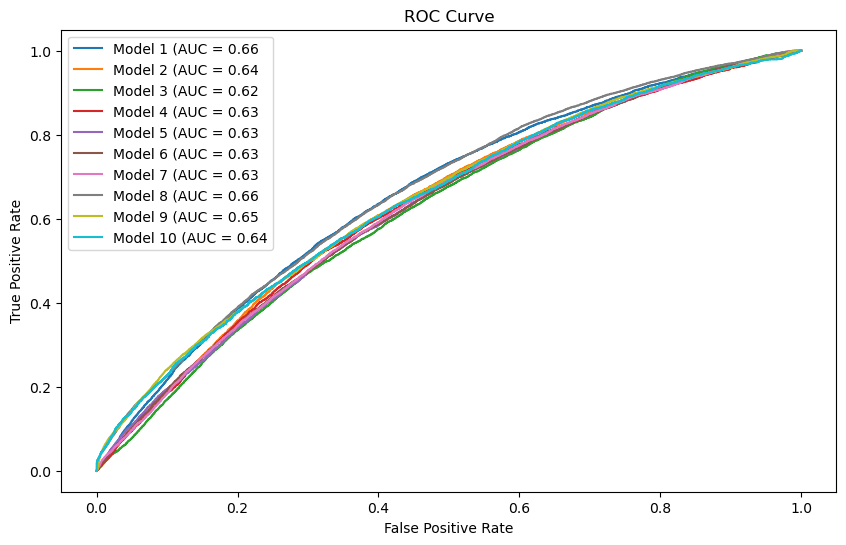

In [81]:
#Plotting ROC curve
plt.figure(figsize=(10, 6)) 

plt.plot(fpr1, tpr1, label=f'Model 1 (AUC = {auc1:.2f}')        #Plotting the name of the model with its respective AUC value to 2 decimal places
plt.plot(fpr2, tpr2, label=f'Model 2 (AUC = {auc2:.2f}')
plt.plot(fpr3, tpr3, label=f'Model 3 (AUC = {auc3:.2f}')
plt.plot(fpr4, tpr4, label=f'Model 4 (AUC = {auc4:.2f}')
plt.plot(fpr5, tpr5, label=f'Model 5 (AUC = {auc5:.2f}')
plt.plot(fpr6, tpr6, label=f'Model 6 (AUC = {auc6:.2f}')
plt.plot(fpr7, tpr7, label=f'Model 7 (AUC = {auc7:.2f}')
plt.plot(fpr8, tpr8, label=f'Model 8 (AUC = {auc8:.2f}')
plt.plot(fpr9, tpr9, label=f'Model 9 (AUC = {auc9:.2f}')
plt.plot(fpr10, tpr10, label=f'Model 10 (AUC = {auc10:.2f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Visualising coefficients over the years

In [68]:
#Based on discovery from R, remove uncommon features so that there will be similar features across all 10 years
features = ['numerical__Dates', 'numerical__CRSDepTime', 'numerical__CRSArrTime', 'numerical__Distance', 'numerical__Lat_Origin', 'numerical__Long_Origin', 'numerical__Lat_Dest', 'numerical__Long_Dest', 'categorical__UniqueCarrier_AS', 'categorical__UniqueCarrier_CO', 'categorical__UniqueCarrier_DL', 'categorical__UniqueCarrier_NW', 'categorical__UniqueCarrier_UA', 'categorical__UniqueCarrier_US', 'categorical__UniqueCarrier_WN']

##### We only want similar features that is available throughout all the 10 years, thus removing those uncommon ones. In python, the first value is '0' and not '1'. 

In [82]:
remove1 = [8, 12, 14]
coefficient1= np.delete(coefficient1, remove1)     #Remove coefficients that is uncommon
print(coefficient1)

[-0.2164422  -0.05229458  0.12391479  0.37676219  0.03092397  0.09063153
  0.11529277  0.16056519  0.17859383 -0.68179062 -0.84236882 -0.39828721
 -0.71922262 -0.46828171 -0.52972329]


In [70]:
remove2 = [8, 9, 13, 15]
coefficient2 = np.delete(coefficient2, remove2)
print(coefficient2)

[-0.03961027  0.03318888  0.14020042  0.31871228  0.04794587  0.05147586
  0.07923365  0.16081871  1.05035598 -0.05787685  0.06912103  0.27778377
  0.06694405  0.49441451  0.38986885]


In [71]:
remove3 = [8, 9, 13, 14, 16]
coefficient3 = np.delete(coefficient3, remove3)
print(coefficient3)

[-0.04521649 -0.07475855  0.09520309  0.31583627  0.00119995  0.1178599
  0.04061697  0.13824294  1.04353126  0.1949801   0.31897299  0.58398194
  0.34846907  0.25358054  0.39520657]


In [72]:
remove4 = [8, 12, 13]
coefficient4 = np.delete(coefficient4, remove4)
print(coefficient4)

[ 0.04589069 -0.08558217  0.21814259  0.27997894  0.04697998  0.03947021
  0.05802173  0.08477891  0.26821371 -0.6914568  -0.66125881 -0.39289814
 -0.84155872 -0.79710796 -0.54553817]


In [73]:
remove5 = [8, 10, 12, 14, 15, 16, 17, 18, 20, 21, 25]
coefficient5 = np.delete(coefficient5, remove5)
print(coefficient5)

[-0.03339441 -0.04418667  0.08382025  0.35640464  0.04223347  0.05862617
  0.04468345  0.14290868  0.89641235 -0.08010524 -0.04744773 -0.0562674
 -0.18697224 -0.21684596  0.30825734]


In [74]:
remove6 = [8, 10, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25]
coefficient6 = np.delete(coefficient6, remove6)
print(coefficient6)

[ 0.05449658 -0.13308745  0.2238527   0.33849999  0.04224984  0.05034169
  0.01258857  0.03062448  0.22761252 -0.16792375 -0.38800395 -0.14876337
 -0.42895997 -0.25381335  0.33508192]


In [75]:
remove7 = [8, 10, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 27]
coefficient7 = np.delete(coefficient7, remove7)
print(coefficient7)

[-0.04765962 -0.0957127   0.16288204  0.3367842   0.02714476  0.02781216
  0.03352918  0.1126719   0.42703651 -0.03965907 -0.15272887  0.12874254
 -0.31707364 -0.18915273 -0.00956837]


In [76]:
remove8 = [8, 9, 11, 14, 15, 16, 17, 18, 20, 21, 22, 26, 27]
coefficient8 = np.delete(coefficient8, remove8)
print(coefficient8)

[ 0.01010159 -0.13641627  0.18692524  0.4107873   0.03027851  0.09039588
  0.03280061  0.05857689  0.3551591   0.05560828 -0.28190805 -0.27224731
 -0.32893401 -0.26715554 -0.17439259]


In [77]:
remove9 = [8, 9, 10, 12, 15, 16, 17, 18, 19, 21, 22, 26, 27]
coefficient9 = np.delete(coefficient9, remove9)
print(coefficient9)

[-0.00688024 -0.36562069  0.44363828  0.31630702  0.01621434 -0.00093327
  0.02744371  0.10535791  0.27410745  0.00583357 -0.26017467 -0.25466646
 -0.44438605 -0.29696124 -0.28135091]


In [78]:
remove10 = [8, 9, 10, 12, 15, 16, 17, 18, 19, 21, 22, 26, 27]
coefficient10 = np.delete(coefficient10, remove10)
print(coefficient10)

[-0.09405234 -0.67769773  0.63329586  0.28852781  0.01733112  0.2030263
  0.08134306 -0.02517061  0.2847138  -0.51807784 -0.31637851 -0.55609098
 -0.82055533 -0.5268702  -0.10032367]


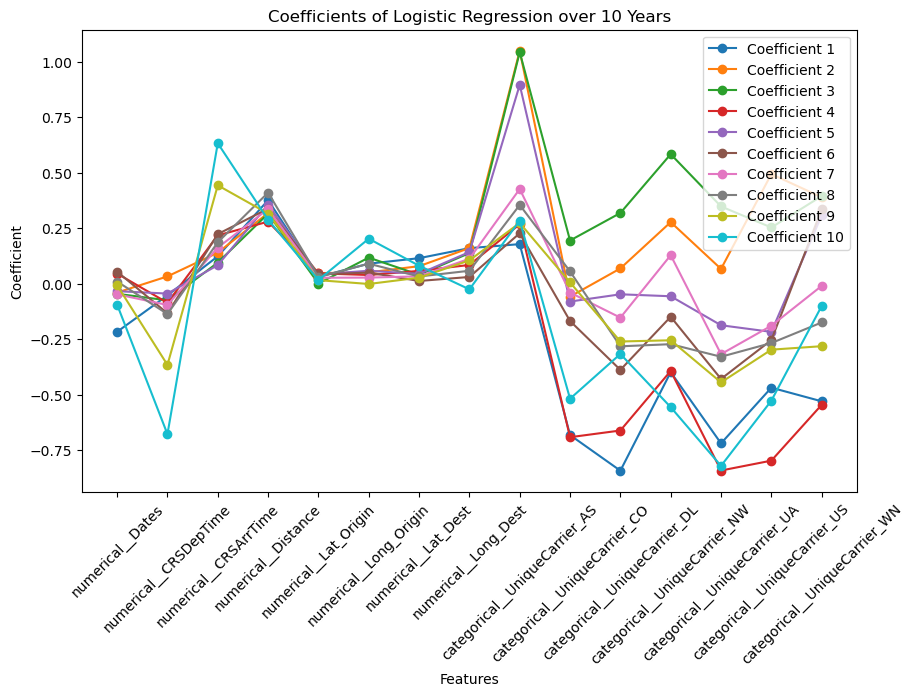

In [83]:
features = features               #To show features in the x-axis

plt.figure(figsize=(10, 6))

plt.plot(features, coefficient1, linestyle='-', marker='o', label='Coefficient 1')    #Plotting
plt.plot(features, coefficient2, linestyle='-', marker='o', label='Coefficient 2')
plt.plot(features, coefficient3, linestyle='-', marker='o', label='Coefficient 3')
plt.plot(features, coefficient4, linestyle='-', marker='o', label='Coefficient 4')
plt.plot(features, coefficient5, linestyle='-', marker='o', label='Coefficient 5')
plt.plot(features, coefficient6, linestyle='-', marker='o', label='Coefficient 6')
plt.plot(features, coefficient7, linestyle='-', marker='o', label='Coefficient 7')
plt.plot(features, coefficient8, linestyle='-', marker='o', label='Coefficient 8')
plt.plot(features, coefficient9, linestyle='-', marker='o', label='Coefficient 9')
plt.plot(features, coefficient10, linestyle='-', marker='o', label='Coefficient 10')


plt.title('Coefficients of Logistic Regression over 10 Years')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.legend()
plt.xticks(rotation=45)                # Rotate the x-axis labels by 45 degrees
plt.show()